# Análise Exploratória de Dados - Problema de análise de empréstimos
### Luís Guilherme Ribeiro

In [370]:
# Importanto as bibliotecas necessárias para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Contextualizando o problema

A LendingClub é uma empresa de empréstimos peer-to-peer (P2P) dos EUA, que visa atender **investidores e solicitantes de empréstimos** através de uma plataforma online.Quando a empresa recebe um pedido de empréstimo, ela deve tomar uma decisão para aprovação do empréstimo com base no **perfil do solicitante**. Dois tipos de riscos estão associados à decisão:
 - Se for provável que o solicitante pague o empréstimo, a não aprovação do empréstimo resultará em **perda de negócios** para a empresa;
 - Se for provável que o solicitante não pague o empréstimo, a aprovação do empréstimo pode levar a uma **perda financeira** para a empresa.

<br>Portanto, predição do risco do empréstimo pode ser um fator fundamental para a tomada de decisão. Assim, a empresa deseja criar um **modelo de predição do risco do empréstimo**. Este modelo deve ser capaz de identificar se o solicitante será um **bom ou ruim pagador do empréstimo, através do seu perfil.**


## Importanto conjunto de dados

In [3]:
# Importando base de dados de um arquivo CSV
# dataset url: https://www.kaggle.com/datasets/wordsforthewise/lending-club
data = pd.read_csv("./data/accepted_2007_to_2018Q4.csv")
data.shape

C:\Users\Luis Guilherme\AppData\Local\Temp\ipykernel_13608\2068622547.py:3: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/accepted_2007_to_2018Q4.csv")


(2260701, 151)

Note que temos mais de **2,2 milhões de registros e 151 variáveis**

In [232]:
# Salvando uma cópia dos dados
df = data.copy()

## Etapas da análise exploratória
**1 - Identificar variáveis e tipos de dados**
<br>**2 - Análise de métricas básicas**
<br>**3 - Identificar as variáveis preditoras e alvo**
<br>**4 - Análise univariada**
<br>**5 - Tratamento de outliers**
<br>**6 - Limpeza e transformação de dados**
<br>**7 - Tratamento de valores faltantes**
<br>**8 - Análise multivariada**
<br>**9 - Análise de correlação**

## 1 - Identificar variáveis e tipos de dados
Neste momento estamos entendo nosso conjunto de dados. Precisamos saber quais os tipos das variáveis:
- Númericas 
    - discretas
    - contínuas
- Categóricas 
    - ordinais
    - nominais


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


Note que das **151 variáveis, 113 são numéricas e 38 são categóricas.**
<br> Mais adiante, vamos especificar as discretas, contínuas, ordinais e nominais.

In [234]:
df.select_dtypes('float').head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
0,NaN,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,785.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
df.select_dtypes('object').head()

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,68407277,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,68355089,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,68341763,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,66310712,60 months,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,Dec-2015,Current,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,68476807,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


## 2 - Análise de métricas básicas
Neste momento vamos analisar os dados em termos de **contagens, percentis, média, desvio padrão, máximos e mínimos.**

In [240]:
df_loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,loan_condition
count,0.0,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,...,5754.000000,5754.0,5754.000000,3759.000000,5754.000000,5754.000000,33276.000000,33276.000000,33276.000000,1.345310e+06
mean,NaN,1.441997e+04,1.441156e+04,1.438914e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,3.177944e-01,6.961850e+02,...,147.434105,3.0,13.949426,410.696640,10995.141594,184.689314,5029.933417,47.691708,13.158132,8.003739e-01
std,NaN,8.717051e+03,8.713118e+03,8.715494e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,8.779922e-01,3.185251e+01,...,128.468905,0.0,9.777414,357.512115,7474.257379,196.459790,3684.827275,7.306107,8.235592,3.997195e-01
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.250000e+02,...,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000,0.000000e+00
25%,NaN,8.000000e+03,8.000000e+03,7.875000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,0.000000e+00,6.700000e+02,...,53.267500,3.0,5.000000,147.450000,5037.307500,39.570000,2228.617500,45.000000,6.000000,1.000000e+00
50%,NaN,1.200000e+04,1.200000e+04,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,0.000000e+00,6.900000e+02,...,109.820000,3.0,15.000000,303.450000,9305.100000,120.970000,4174.680000,45.000000,14.000000,1.000000e+00
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,0.000000e+00,7.100000e+02,...,203.350000,3.0,23.000000,564.825000,15302.360000,267.605000,6884.237500,50.000000,18.000000,1.000000e+00
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,3.900000e+01,8.450000e+02,...,943.940000,3.0,37.000000,2343.150000,39542.450000,1407.860000,33601.000000,521.350000,181.000000,1.000000e+00


Como ainda estamos com um número alto de variáveis e não tratadas, fica difícil de obter conclusões.
<br>Mas é possível notar que algumas variáveis possuem **dados faltantes, possuem minimos e máximos distantes.**

## 3 - Identificar as variáveis preditoras e alvo
Neste momento, precisamos definir o atributo alvo (target) das demais variáveis (preditoras)

A variável **loan_status** mostra o status do empréstimo, se ele foi pago, está atrasado, em dia, em período de carência, etc.

In [236]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

Considerando apenas os **eventos efetivados**, vamos manter apenas as categorias: **Fully Paid e Charged Off.**
<br>Pois, as demais categorias estão sujeitas a mudanças.

In [237]:
# Mantendo apenas as categorias efetivadas
df_loan = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df_loan.shape

(1345310, 151)

Agora temos **1,3 milhões de registros.**

Para facilitar a manipulação dos dados e o aprendizado dos algoritmos, vamos binarizar a variável alvo.
Sendo **0 = mau pagador e 1 = bom pagador**

In [238]:
# Binarização do atributo alvo (0 = mau pagador, 1 = bom pagador)
pd.set_option('mode.chained_assignment', None)
df_loan.loc[:,('loan_condition')] = np.nan

def loan_condition(status):
    if status == "Charged Off":
        return 0 #Ruim
    else:
        return 1 #Bom
    
df_loan['loan_condition'] = df_loan['loan_status'].apply(loan_condition)

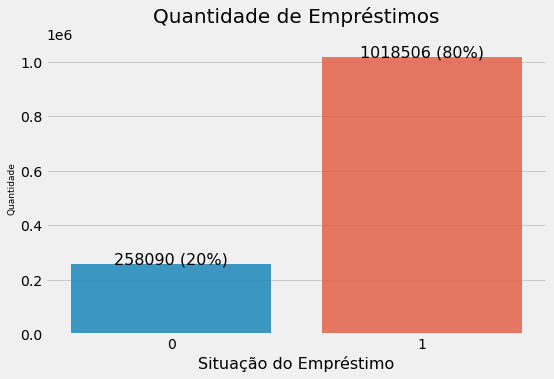

In [343]:
# Plotando gráfico do balanceamento das classes
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,5))
sns.despine(left=True)

g = sns.countplot(x=df_loan['loan_condition'], alpha=0.85)
g.set_title("Quantidade de Empréstimos", fontsize=20, pad=20)
g.set_xlabel("Situação do Empréstimo", fontsize=16)
g.set_ylabel("Quantidade", fontsize=9)

tot = len(df_loan['loan_condition'])
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    tax = round((height/tot)*100)
    g.text(p.get_x()+p.get_width()/2.,
            height,
            '{:.0f} ({:.0f}%)'.format(height,tax),
            ha="center", fontsize=16) 
    
plt.show()

Note no gráfico acima que estamos trabalhando com o conjunto de dados **desbalanceado**.

## 4 - Análise univariada
Nesta etapa o foco é identificar e se possível tratar as seguintes abordagens:
- Valores únicos
- Valores faltantes
- Duplicados
- Assimetria (distribuição)
- Variáveis categóricas
- Variáveis numéricas
- Análise gráfica

### 4.1 Valores únicos

In [241]:
len(pd.unique(df_loan['id']))

1345310

In [242]:
# Deixando a variável ID como index
df_loan.set_index('id', drop=True, inplace=True)

Como a variável **ID** é única deixamos ela como **index**.

### 4.2 Valores faltantes

In [243]:
# Analisando % de dados faltantes nas variáveis
for col in df_loan.columns:
    taxa_nulos = round(df_loan[col].isnull().sum()/df.shape[0],2)
    if taxa_nulos >= 0.95:
        print(col, round(df_loan[col].isnull().sum()/df.shape[0],2))

Note que temos varios casos com dados faltantes em variáveis.
Portanto, definimos que as variáveis que temos mais de **95% com dados faltantes vamos excluí-las**, pois não possuem dados suficientes para imputação.

In [244]:
na_to_drop = []
for col in df_loan.columns:
    q = df_loan[col].isnull().sum()/df_loan.shape[0]
    if q >= 0.95: # Considerando um variável deve ter pelo menos 5% dos dados
        na_to_drop.append(col)
    else:
        pass
len(na_to_drop)

38

Das 151 variáveis, **38 possuíam mais de 95% de dados faltantes.**

In [245]:
print(df_loan.shape)
df_loan = df_loan.drop(columns= na_to_drop)
print(df_loan.shape)

(1345310, 151)
(1345310, 113)


Agora temos **113 variáveis**

### 4.3 Dados duplicados

In [246]:
# Removendo dados duplicados (quando houver)
print(df_loan.shape)
df_loan.drop_duplicates(inplace=True)
print(df_loan.shape)

(1345310, 113)
(1345310, 113)


Não possuimos dados duplicados.

### 4.4  Assimetria / Simetria
- **Skewness:** mede a cauda da distribuição
    - com valor > 0, significa que a cauda da distribuição está mais para a **direita**
    - com valor < 0, significa que a cauda da distribuição está mais para a **esquerda**
- **Kurtosis:** mede o grau de achatamento da curva em relação a normal
    - se o valor encontrado é igual 0, você tem uma distribuição mesocúrtica;
    - se maior que 0, leptocúrtica, correspondendo a uma curva mais **pontuda**; 
    - se menor que 0, platicúrtica, uma curva mais **achatada**, com maior variabilidade dos dados.

In [247]:
skewness = df_loan.skew()
skewness.sort_values()

last_fico_range_low      -3.233771
pct_tl_nvr_dlq           -2.212704
loan_condition           -1.502926
last_fico_range_high     -0.600329
il_util                  -0.451528
                           ...    
num_tl_120dpd_2m         45.362212
annual_inc               46.317938
total_rev_hi_lim         51.762854
delinq_amnt              94.599172
tot_coll_amt            666.312700
Length: 89, dtype: float64

In [248]:
kurtosis = df_loan.kurtosis()
kurtosis.sort_values()

percent_bc_gt_75                   -1.286323
bc_util                            -0.904305
mths_since_recent_bc_dlq           -0.834882
mths_since_last_delinq             -0.737877
mths_since_last_major_derog        -0.670739
                                   ...      
tax_liens                        3670.316705
annual_inc                       4812.432310
total_rev_hi_lim                12924.091881
delinq_amnt                     14048.636159
tot_coll_amt                   483985.686288
Length: 89, dtype: float64

Variáveis com curvas achatadas indicam que os dados estão com alta variabilidade.
Isso pode ser ruim em, termos de correlação, e bom em termos preditores de classificação.

### 4.5 Analisando variáveis categóricas
Aqui, vamos analisar as variáveis categóricas

In [249]:
df_cat = df_loan.select_dtypes('object')
df_cat.shape

(1345310, 24)

Estamos com 26 variáveis categóricas.
<br>Abaixo vamos analisar a cardinalidade e como estão distribuídos os valores para cada categoria. Além disso vamos separar em **ordinais e nominais**.

In [250]:
for col in df_cat.columns:
    print('\n\n')
    print('Variável: ', col)
    print('Cardinalidade: ', len(df_cat[col].value_counts()))
    print('% Faltantes: ',round(df_loan[col].isnull().sum()/df.shape[0],2))
    print(df_cat[col].value_counts())




Variável:  term
Cardinalidade:  2
% Faltantes:  0.0
 36 months    1020743
 60 months     324567
Name: term, dtype: int64



Variável:  grade
Cardinalidade:  7
% Faltantes:  0.0
B    392741
C    381686
A    235090
D    200953
E     93650
F     32058
G      9132
Name: grade, dtype: int64



Variável:  sub_grade
Cardinalidade:  35
% Faltantes:  0.0
C1    85494
B4    83199
B5    82538
B3    81827
C2    79213
C3    74998
C4    74421
B2    74024
B1    71153
C5    67560
A5    64003
A4    52235
D1    51321
D2    44848
A1    43678
D3    39317
A3    37996
A2    37178
D4    35566
D5    29901
E1    23749
E2    21377
E3    18387
E4    15720
E5    14417
F1     9970
F2     7198
F3     6088
F4     4859
F5     3943
G1     2997
G2     2131
G3     1614
G4     1280
G5     1110
Name: sub_grade, dtype: int64



Variável:  emp_title
Cardinalidade:  378353
% Faltantes:  0.04
Teacher                          21268
Manager                          19470
Owner                            10302
Registered Nurse

Cardinalidade:  61682
% Faltantes:  0.01
Debt consolidation             660960
Credit card refinancing        249910
Home improvement                75073
Other                           66778
Major purchase                  24045
                                ...  
Refi Temp                           1
C/C Refi                            1
loan options                        1
BECOME  DEBT FREE!!!!               1
debt reduction/hone updates         1
Name: title, Length: 61682, dtype: int64



Variável:  zip_code
Cardinalidade:  943
% Faltantes:  0.0
945xx    15005
750xx    14474
112xx    13829
606xx    12433
300xx    12124
         ...  
095xx        1
009xx        1
872xx        1
513xx        1
525xx        1
Name: zip_code, Length: 943, dtype: int64



Variável:  addr_state
Cardinalidade:  51
% Faltantes:  0.0
CA    196528
TX    110169
NY    109842
FL     95606
IL     51720
NJ     48449
PA     45522
OH     43842
GA     43376
VA     38040
NC     37784
MI     35234
AZ     32695
M

In [251]:
# Separando as variáveis categóricas
alvo = ['loan_status']
datas = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
nominais = ['emp_title', 'zip_code']
ordinais = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state',
            'initial_list_status', 'application_type', 'verification_status_joint', 'disbursement_method', 'debt_settlement_flag']
cardinalidade = [2, 7, 35, 11, 6, 3, 14, 51,
            2, 2, 3, 2, 2]


Após analisarmos as **variáveis categóricas**, notamos que é necessário realizar as seguintes ações em algumas variáveis:
- Limpeza
    - Informações desnecessárias: desc, title, next_pymnt_d
    - Alta cadinalidade categórica: emp_title, zip_code, sub_grade, addr_state
    - Cardinalidade unitária: verification_status_joint, pymnt_plan, url, hardship_flag
    - Datas em processo mutáveis: earliest_cr_line, last_pymnt_d, last_credit_pull_d, issue_d
- Transformação
    - Binarização: home_ownership, grade, purpose

**Variáveis de maior interesse:**
- term (contrato)
- grade (classe social)
- home_ownership (casa própria)
- purpose (propósito)
- debt_settlement_flag (ja pagou dívidas)

### 4.6 Analisando variáveis numéricas

In [252]:
df_cont = df_loan.select_dtypes('float')
df_cont.shape

(1345310, 88)

Agora vamos analisar as 90 variáveis contínuas.
<br>Primeiro vamos começar com as variávbeis de **baixa cardinalidade (<30):**

In [253]:
for col in df_cont.columns:
    card = len(df_cont[col].value_counts())
    if card <= 30:
        print('\n\n')
        print('Variável: ', col)
        print('Cardinalidade: ',card)
        print('% Faltantes: ',round(df_loan[col].isnull().sum()/df.shape[0],2))
        print(df_cont[col].value_counts())




Variável:  inq_last_6mths
Cardinalidade:  9
% Faltantes:  0.0
0.0    770417
1.0    366681
2.0    136791
3.0     51659
4.0     13862
5.0      4888
6.0       941
7.0        48
8.0        22
Name: inq_last_6mths, dtype: int64



Variável:  out_prncp
Cardinalidade:  1
% Faltantes:  0.0
0.0    1345310
Name: out_prncp, dtype: int64



Variável:  out_prncp_inv
Cardinalidade:  1
% Faltantes:  0.0
0.0    1345310
Name: out_prncp_inv, dtype: int64



Variável:  collections_12_mths_ex_med
Cardinalidade:  15
% Faltantes:  0.0
0.0     1324213
1.0       19502
2.0        1292
3.0         153
4.0          53
5.0          18
6.0           9
7.0           4
10.0          2
12.0          2
9.0           2
14.0          1
16.0          1
20.0          1
8.0           1
Name: collections_12_mths_ex_med, dtype: int64



Variável:  policy_code
Cardinalidade:  1
% Faltantes:  0.0
1.0    1345310
Name: policy_code, dtype: int64



Variável:  acc_now_delinq
Cardinalidade:  8
% Faltantes:  0.0
0.0     1338972
1

Agora vamos analisar as variáveis contínuas com **alta cardinalidade**:

In [254]:
test_col = ['annual_inc']
for col in test_col:
    card = len(df_cont[col].value_counts())
    if card > 30:
        kur = round(df_cont[col].kurtosis(),3)
        sk = round(df_cont[col].skew(),3)
        print('\n',col)
        print('Cardinalidade: ',card)
        print('% Faltantes: ',round(df_loan[col].isnull().sum()/df.shape[0],4))
        print('Média: ',round(df_cont[col].mean(),2))
        print('Desvio: ',round(df_cont[col].std(),2))
        print('Skew: ', sk, '(','direita' if sk >0 else 'esquerda',')')
        print('Kurt: ', kur, '(','pontuda' if kur >0 else 'achatada',')')
        print('Distrbuição:')
        print(df_cont[col].value_counts())


 annual_inc
Cardinalidade:  64362
% Faltantes:  0.0
Média:  76247.64
Desvio:  69925.1
Skew:  46.318 ( direita )
Kurt:  4812.432 ( pontuda )
Distrbuição:
60000.00     51982
50000.00     45725
65000.00     38698
70000.00     36956
40000.00     35565
             ...  
25674.00         1
93032.04         1
104219.00        1
86985.00         1
180792.00        1
Name: annual_inc, Length: 64362, dtype: int64


Nesta etapa é fundamental entender o significadode cada variável, portanto escrevemos este dicionário, que foi analisado através da fonte https://wiki.datrics.ai/more-features 

Descrição das variáveis: 
- funded_amnt (valor do empréstimo)
- int_rate (taxa de juros)
- funded_amnt_inv (valor comprometido pelos investidores)
- installment (parcelas)
- annual_inc (renda anual do solicitante)
- dti (relação dívida/renda do solicitante)
- delinq_2yrs (30 dias passados)*
- fico_range_low (inicio FICO do solicitante) [Fico é uma pontuação de risco]
- fico_range_high (limite FICO do solicitante)
- mths_since_last_delinq (meses desde a ultima inadimplencia)
- mths_since_last_record (meses desde o ultima registro)*
- open_acc (créditos abertos)
- pub_rec (registros publicos)
- revol_bal (saldo rotativo do crédito)
- revol_util (saldo rotativo utilizado)
- total_acc (total de créditos)
- total_pymnt (pagamento recebido do empréstimo) *
- total_pymnt_inv (pagamento recebido por parte dos investidores) *
- total_rec_prncp (Principal recebido) *
- total_* (variáveis momentâneas)*
- collection_recovery_fee (pós cobrança) *
- recoveries (recuperção de pagamento) *
- last_pymnt_amnt (último valor recebido) *
- last_fico_range_*
- mths_since_last_major_derog (meses) *
- num_sats (Contas satisfatórias)
- num_il_tl (contas parceladas)
- num_actv_bc_tl (contas parceladas ativas)
- num_bc_tl (contas bancárias)
- num_bc_sats (contas bancárias satisfatórias)
- num_actv_bc_tl (contas bc ativas)
- mort_acc (contas hipotecárias)
- avg_cur_bal (saldo médio em todas as contas)
- total_bc_limit (limite de crédito nos bancos)
- emp_length (tempo de trabalho em anos 0 a 1, 1 significada 10 anos ou mais)
- pct_tl_nvr_dlq (Porcentagem de negócios nunca inadimplentes)
- num_rev_accts (contas rotativas)
- tot_hi_cred_lim (limite de credito)
- tot_coll_amt (total de cobrança ja devida)
- tot_cur_bal (saldo total de todas as contas)
- total_rev_hi_lim (total limite de crédito rotativo)
- num_actv_bc_tl (contas ativas de crtão de banco
- total_il_high_credit_limit (limite da parcela de crédito)
- num_op_rev_tl (contas rotativas)
- num_rev_tl_bal_gt_0 (Número de negócios rotativos com saldo >0)
- bc_util (relação entre saldo e limite de crédito)
- bc_open_to_buy (Total aberto para comprar em cartões bancários rotativos.)
- total_bal_ex_mort (Saldo total de crédito excluindo hipoteca)
- total_bc_limit (crédito total do cartão bancário)
- pub_rec_bankruptcies (Número de falências de registro público)
- tax_liens (número de ônus fiscais)

Após analisarmos as **variáveis numéricas**, notamos que é necessário realizar as seguintes ações:
- Limpeza
    - Variáveis mutáveis que não fazem sentido para o problema: total_pymnt, total_pymnt_inv, total_rec_prncp, recoveries, last_pymnt_amnt, mths_since_last_major_derog, last_fico_range_low, last_fico_range_high, collection_recovery_fee, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_revol_delinq
    - Cardinalidade unitária: out_prncp, out_prncp_inv, policy_code
- Transformação
    - Discretizar: annual_inc, int_rate

### 4.7 - Análise gráfica (univariada)
Nesta etapa vamos analisar graficamente algumas variáveis de interessantes.
- Histogramas (distribuição)
- Box-plot (identificação de Outliers)

Neste momento já conhecemos as variáveis e sabemos quais são mais interessantes de analisar graficamente.
<br> Separamos as mais interessantes:
- Numéricas [N]
    - funded_amnt (valor do empréstimo)
    - int_rate (taxa de juros)
    - installment (parcelas)
    - annual_inc (renda anual)
    - total_acc (total de créditos)
    - avg_cur_bal (saldo médio em todas as contas)
- Categóricas [C]
    - term (contrato)
    - grade (classe social)
    - home_ownership (casa própria)
    - purpose (propósito)
    - debt_settlement_flag (ja pagou dívidas)

### [N] funded_amnt (valor do empréstimo)

Média:  14411.56
Desvio:  8713.12


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

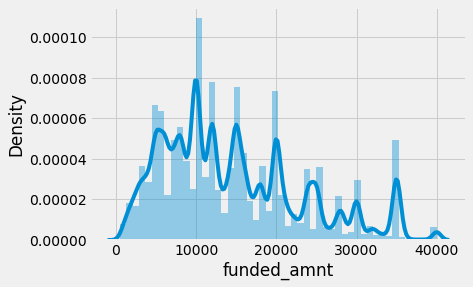

In [255]:
# Histograma
print('Média: ',round(df_cont['funded_amnt'].mean(),2))
print('Desvio: ',round(df_cont['funded_amnt'].std(),2))
sns.distplot(df_cont['funded_amnt']) 

<AxesSubplot:xlabel='funded_amnt'>

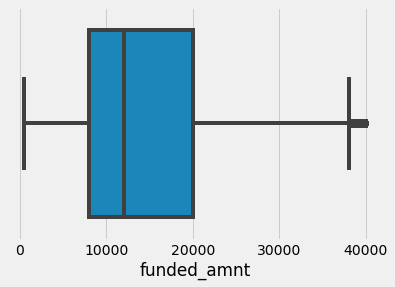

In [256]:
# BoxPlot
sns.boxplot(df_cont['funded_amnt'])

### [N] int_rate (taxa de juros)

Média:  13.24
Desvio:  4.77


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

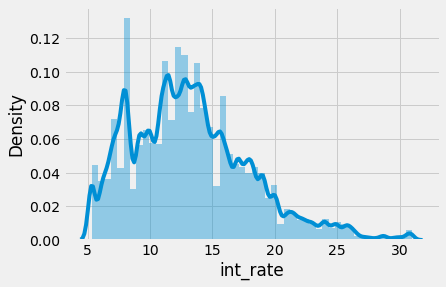

In [257]:
# Histograma
print('Média: ',round(df_cont['int_rate'].mean(),2))
print('Desvio: ',round(df_cont['int_rate'].std(),2))
sns.distplot(df_cont['int_rate']) 

<AxesSubplot:xlabel='int_rate'>

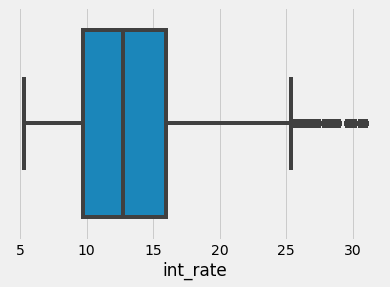

In [258]:
# BoxPlot
sns.boxplot(df_cont['int_rate'])

### [N] installment (Valor da parcela)

Média:  438
Desvio:  262


<AxesSubplot:xlabel='installment', ylabel='Density'>

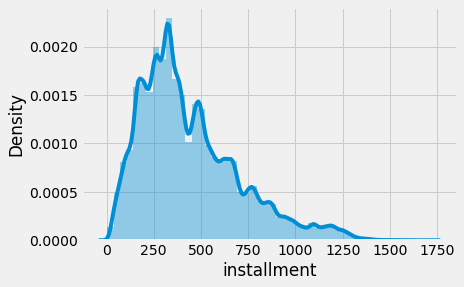

In [259]:
# Histograma
print('Média: ',round(df_loan['installment'].mean()))
print('Desvio: ',round(df_loan['installment'].std()))
sns.distplot(df_loan['installment']) 

<AxesSubplot:xlabel='installment'>

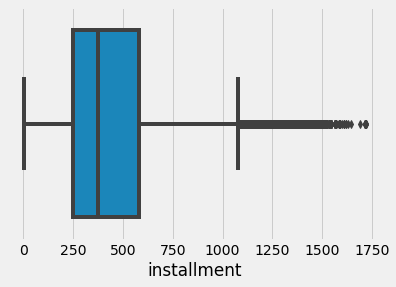

In [260]:
# BoxPlot
sns.boxplot(df_loan['installment'])

### [N] annual_inc (renda anual do investidor)

Média:  76248
Desvio:  69925


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

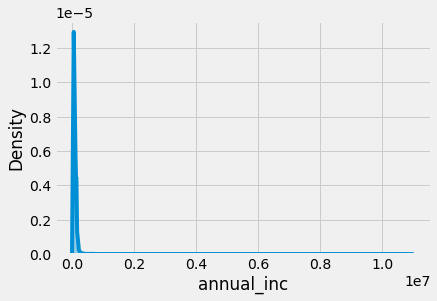

In [261]:
# Histograma
print('Média: ',round(df_loan['annual_inc'].mean()))
print('Desvio: ',round(df_loan['annual_inc'].std()))
sns.distplot(df_loan['annual_inc']) 

<AxesSubplot:xlabel='annual_inc'>

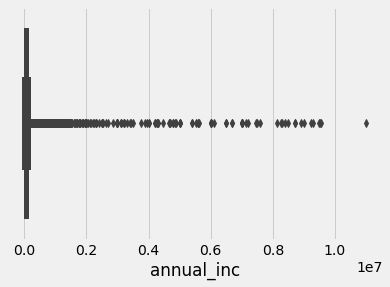

In [262]:
# BoxPlot
sns.boxplot(df_loan['annual_inc'])

A variável acima, possivelmnte **possui outliers**

### [N] open_acc (créditos abertos)

Média:  12
Desvio:  5


<AxesSubplot:xlabel='open_acc', ylabel='Density'>

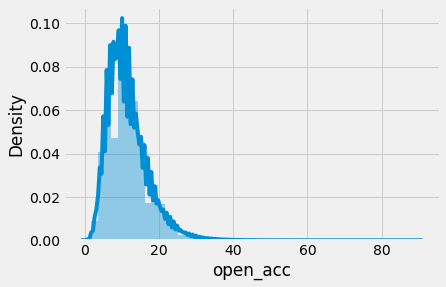

In [263]:
# Histograma
print('Média: ',round(df_loan['open_acc'].mean()))
print('Desvio: ',round(df_loan['open_acc'].std()))
sns.distplot(df_loan['open_acc']) 

<AxesSubplot:xlabel='open_acc'>

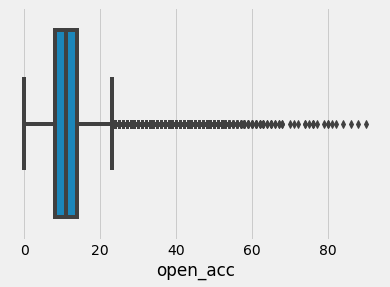

In [264]:
# BoxPlot
sns.boxplot(df_loan['open_acc'])

A variável acima, possivelmnte **possui outliers**

### [N] avg_cur_bal (saldo  em todas as contas)

Média:  13489
Desvio:  16290


<AxesSubplot:xlabel='avg_cur_bal', ylabel='Density'>

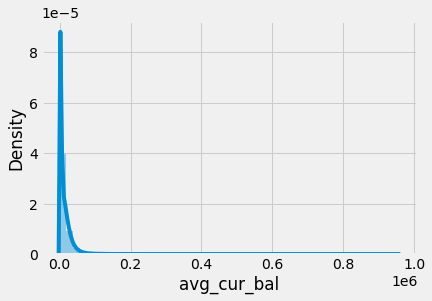

In [265]:
# Histograma
print('Média: ',round(df_loan['avg_cur_bal'].mean()))
print('Desvio: ',round(df_loan['avg_cur_bal'].std()))
sns.distplot(df_loan['avg_cur_bal']) 

<AxesSubplot:xlabel='avg_cur_bal'>

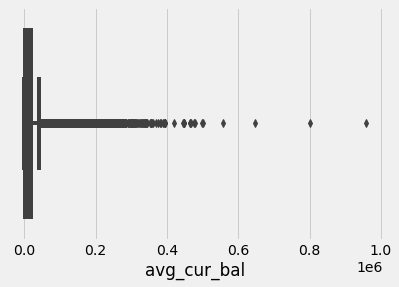

In [266]:
# BoxPlot
sns.boxplot(df_loan['avg_cur_bal'])

A variável acima, possivelmnte **possui outliers**

### [C] term (contrato)

<BarContainer object of 2 artists>

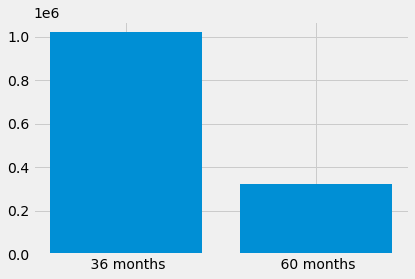

In [267]:
# Distribuição das categorias (barras)
plt.bar(df_loan['term'].value_counts().index, df_loan['term'].value_counts().values, width=0.8)

### [C] grade (classe social)

<BarContainer object of 7 artists>

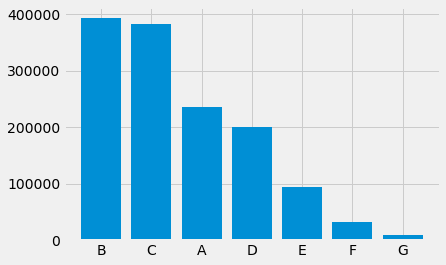

In [268]:
# Distribuição das categorias
plt.bar(df_loan['grade'].value_counts().index, df_loan['grade'].value_counts().values, width=0.8)

fonte: https://en.wikipedia.org/wiki/NRS_social_grade

### [C] home_ownership (casa própria)

<BarContainer object of 6 artists>

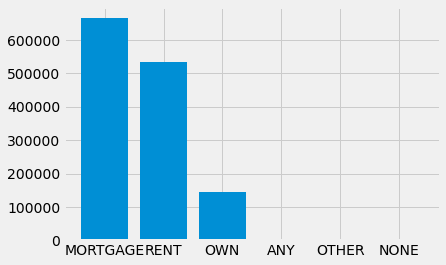

In [269]:
# Distribuição das categorias
plt.bar(df_loan['home_ownership'].value_counts().index, df_loan['home_ownership'].value_counts().values, width=0.8)

### [C] purpose (propósito)

<BarContainer object of 3 artists>

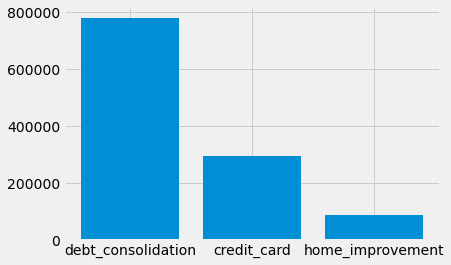

In [270]:
# Distribuição das categorias
plt.bar(df_loan['purpose'].value_counts().head(3).index, df_loan['purpose'].value_counts().head(3).values, width=0.8)

### [C] debt_settlement_flag (ja pagou dívidas)

<BarContainer object of 2 artists>

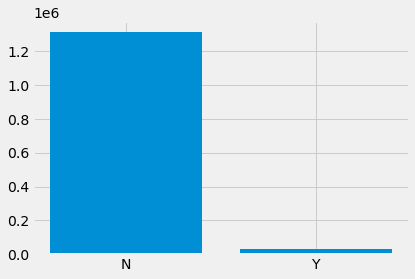

In [271]:
# Distribuição das categorias
plt.bar(df_loan['debt_settlement_flag'].value_counts().index, df_loan['debt_settlement_flag'].value_counts().values, width=0.8)

### emp_length (Tempo no emprego)

<BarContainer object of 5 artists>

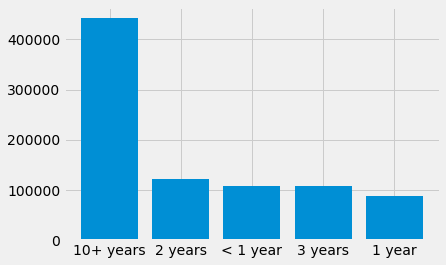

In [272]:
# Distribuição das categorias
plt.bar(df_loan['emp_length'].value_counts().head(5).index, df_loan['emp_length'].value_counts().head(5).values, width=0.8)

## 5 - Tratamento de Outliers
- Identificar ruídos, discrepâncias, anomalias, erros.
- Excluir possíveis outliers

Através da análise univariada, mapeamos as variáveis contínuas que possivelmente tem outliers, são elas:
- avg_cur_bal
- open_acc
- annual_inc

### 5.1 Identificação

In [273]:
df_loan[['tot_cur_bal', 'open_acc', 'annual_inc']].describe()

,tot_cur_bal,open_acc,annual_inc
count,1.277783e+06,1.345310e+06,1.345310e+06
mean,1.411338e+05,1.159352e+01,7.624764e+04
std,1.575478e+05,5.473789e+00,6.992510e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.942300e+04,8.000000e+00,4.578000e+04
50%,8.023100e+04,1.100000e+01,6.500000e+04
75%,2.107150e+05,1.400000e+01,9.000000e+04
max,8.000078e+06,9.000000e+01,1.099920e+07


#### avg_cur_bal

<AxesSubplot:xlabel='avg_cur_bal'>

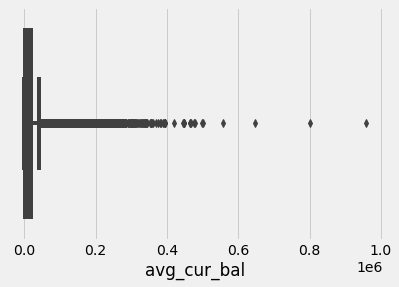

In [274]:
sns.boxplot(df_loan['avg_cur_bal'])

170946.36000000034
(639, 113)


<AxesSubplot:xlabel='avg_cur_bal'>

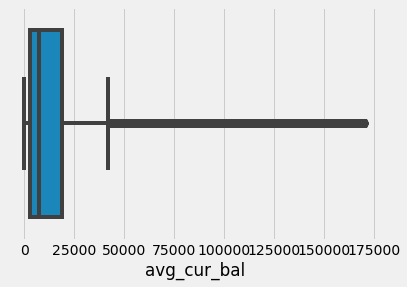

In [275]:
perc = df_loan['avg_cur_bal'].quantile(.9995)
print(perc)
df_out = df_loan[df_loan['avg_cur_bal']>perc]
print(df_out.shape)
df_test = df_loan[df_loan['avg_cur_bal']<=perc]
sns.boxplot(df_test['avg_cur_bal'])

#### open_acc

<AxesSubplot:xlabel='open_acc'>

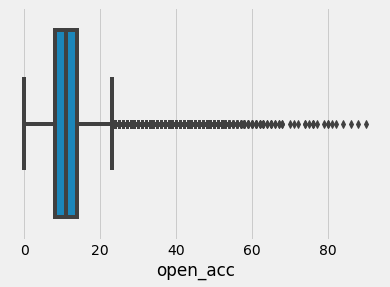

In [276]:
sns.boxplot(df_loan['open_acc'])

53.0
(117, 113)


<AxesSubplot:xlabel='open_acc'>

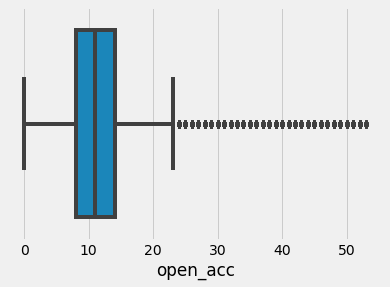

In [277]:
perc = df_loan['open_acc'].quantile(.9999)
print(perc)
df_out = df_loan[df_loan['open_acc']>perc]
print(df_out.shape)
df_test = df_loan[df_loan['open_acc']<=perc]
sns.boxplot(df_test['open_acc'])

#### annual_inc

<AxesSubplot:xlabel='annual_inc'>

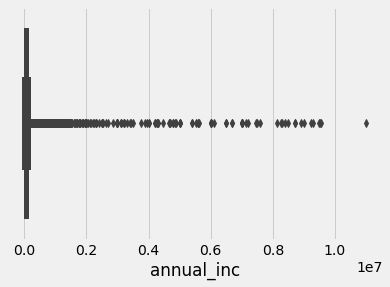

In [278]:
sns.boxplot(df_loan['annual_inc'])

930814.600000158
(404, 113)


<AxesSubplot:xlabel='annual_inc'>

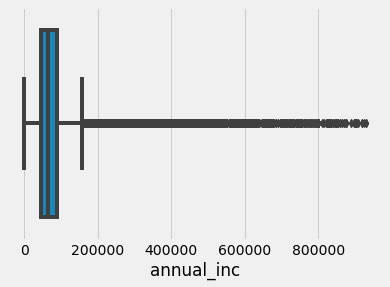

In [279]:
perc = df_loan['annual_inc'].quantile(.9997)
print(perc)
df_out = df_loan[df_loan['annual_inc']>perc]
print(df_out.shape)
df_test = df_loan[df_loan['annual_inc']<=perc]
sns.boxplot(df_test['annual_inc'])

### 5.2 Tratamento

In [280]:
# Função para identificar outliers através do percentil
def handle_percentil_outlier(df, feats, perc):
    df_aux = df
    for f in feats:
        df = df_aux
        quantile = df[f].quantile(perc)
        df_aux = df[df[f] < quantile]
    return df_aux

In [281]:
#Tratando variáveis
# avg_cur_bal
df_out = handle_percentil_outlier(df_loan, ['avg_cur_bal'], 0.9995)
# open_acc
df_out = handle_percentil_outlier(df_out, ['open_acc'], 0.9999)
# annual_inc
df_out = handle_percentil_outlier(df_out, ['annual_inc'], 0.9997)
print(df_loan.shape)
print(df_out.shape)

(1345310, 113)
(1276596, 113)


In [282]:
# Seguindo com o mesmo nome do dataframe
df_loan = df_out
df_loan.shape

(1276596, 113)

Após remover os outliesr de 1,3 milhões de registros, ficamos com **1,27 milhões.**

## 6 - Limpeza e transformação de dados
Nesta etapa vamos realizar as seguintes ações:
- Excluir variáveis que não fazem sentido para o modelo
- Discretizar algumas variáveis numéricas
- Transformar algumas categorias em variáveis binárias
- Criação de novas variáves

### 6.1 Limpeza

In [283]:
# Cópia
df_loan_cp = df_loan
df_loan_cp.shape

(1276596, 113)

In [284]:
# Variáveis não relevantes
del_cols = ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'last_pymnt_amnt', 
            'mths_since_last_major_derog', 'last_fico_range_low', 'last_fico_range_high', 'collection_recovery_fee',
            'mths_since_recent_bc','mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'out_prncp', 'out_prncp_inv',
            'policy_code','desc', 'title', 'emp_title', 'zip_code', 'pymnt_plan', 'loan_amnt', 'funded_amnt_inv',
            'url', 'hardship_flag','issue_d', 'mths_since_recent_inq', 'num_tl_120dpd_2m', 'mo_sin_old_il_acct',
            'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'num_accts_ever_120_pd', 'num_tl_30dpd',
            'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'acc_open_past_24mths', 'last_pymnt_d', 'chargeoff_within_12_mths',
            'collections_12_mths_ex_med', 'last_credit_pull_d', 'inq_last_6mths', 'mths_since_last_record', 'mths_since_rcnt_il',
            'inq_last_12m', 'mths_since_last_delinq', 'sub_grade', 'loan_status', 'addr_state', 'earliest_cr_line', 'initial_list_status',
            'disbursement_method'
          ]
print(len(del_cols))
df_loan.drop(columns=del_cols, inplace=True)
df_loan.shape

51


(1276596, 62)

Agora estamos com **62 variáveis** 

### 6.2 Transformação

### Discretizar algumas variáveis numéricas
Seguem as variáveis que vimos a necessidade de discredzar:
- annual_inc (salário anual) --> income_category
- int_rate (taxa de juros) - pesquisar categorias
- installment (parcelas) - meses para anos
- funded_amnt (valor do empréstimo) - dividir em percentis

#### Classe social (income_category)

Text(0.5, 1.0, 'Faixa salarial')

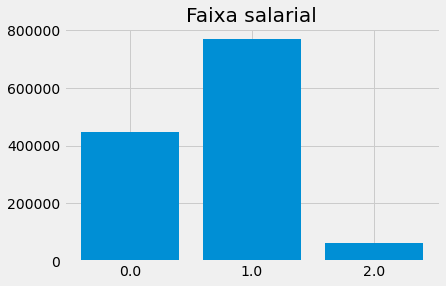

In [285]:
# De acordo com a seguinte fonte: https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system
# 53k e 157k são os limiares de classes sociais nos EUA
df_loan['income_category'] = np.nan
lst = [df_loan]

for col in lst:
    col.loc[col['annual_inc'] <= 53000, 'income_category'] = 0
    col.loc[(col['annual_inc'] > 53000) & (col['annual_inc'] <= 157000), 'income_category'] = 1
    col.loc[col['annual_inc'] > 157000, 'income_category'] = 2
    
plt.bar(df_loan['income_category'].value_counts().sort_index().index.astype(str, copy=False), df_loan['income_category'].value_counts().sort_index().values, width=0.8)
plt.title('Faixa salarial')

####  Categoria de juros (cat_rate)

In [286]:
bins = df_loan['int_rate'].quantile([0, 0.2, 0.6, 1]).values
labels = ['baixo', 'médio', 'alto']
df_loan['cat_rate'] = pd.cut(df_loan['int_rate'], bins=bins, labels=labels)

df_loan[['int_rate','cat_rate']].head()

,int_rate,cat_rate
id,,
68407277,13.99,médio
68355089,11.99,médio
68341763,10.78,médio
68476807,22.45,alto
68426831,13.44,médio


#### Categoria do empréstimo (funded_amnt)

In [287]:
bins = df_loan['funded_amnt'].quantile([0, 0.4, 0.75, 1]).values
labels = ['baixo', 'médio', 'alto']
df_loan['cat_funded_amnt'] = pd.cut(df_loan['funded_amnt'], bins=bins, labels=labels)

df_loan[['funded_amnt','cat_funded_amnt']].head()

,funded_amnt,cat_funded_amnt
id,,
68407277,3600.0,baixo
68355089,24700.0,alto
68341763,20000.0,médio
68476807,10400.0,médio
68426831,11950.0,médio


### Transformar algumas categorias em binárias (Hot Encoder)
Aplicar encoder (getdummies) nas seguintes variáveis categóricas:
- term
- application_type

Tratar antes (generalizar categorias com baixa frequência):
- grade
- home_ownership
- purpose


#### Contrato de 60 meses (term)

In [288]:
# Aparando a string antes de processar
df_loan['term'] = df_loan['term'].apply(lambda val: val.strip())
# função para binarizar
def term_60(v):
    return 1 if v == '60 months' else 0
df_loan['term_60'] = df_loan['term'].apply(term_60)
df_loan[['term','term_60']].head()

,term,term_60
id,,
68407277,36 months,0
68355089,36 months,0
68341763,60 months,1
68476807,60 months,1
68426831,36 months,0


#### Aplicação conjunta (application_type)

In [289]:
# Aparando a string antes de processar
df_loan['application_type'] = df_loan['application_type'].apply(lambda val: val.strip())
# função para binarizar
def join_app(v):
    return 1 if v == 'Joint App' else 0
df_loan['joint_application'] = df_loan['application_type'].apply(join_app)
df_loan[['application_type','joint_application']].head()

,application_type,joint_application
id,,
68407277,Individual,0
68355089,Individual,0
68341763,Joint App,1
68476807,Individual,0
68426831,Individual,0


#### Categoria do grau social (grade --> high_grade)

Text(0.5, 1.0, 'Alto grau social (grade)')

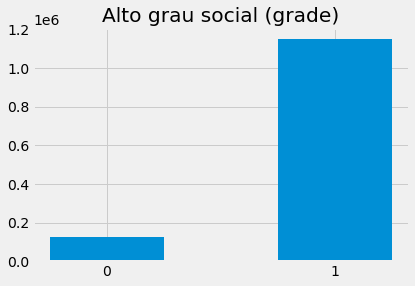

In [290]:
# Aparando a string antes de processar
df_loan['grade'] = df_loan['grade'].apply(lambda val: val.strip())
# função para binarizar
def confiable_grade(v):
    return 1 if v in ['A', 'B', 'C', 'D']  else 0
df_loan['high_grade'] = df_loan['grade'].apply(confiable_grade)
plt.bar(df_loan['high_grade'].value_counts().sort_index().index.astype(str, copy=False), df_loan['high_grade'].value_counts().sort_index().values, width=0.5)
plt.title('Alto grau social (grade)')

#### Casa propria/hipotecada (home_ownership)
Vamos criar 2 variáveis binárias:
- casa própria (own_house)
- casa em hipoteca (mortgage_house)

Text(0.5, 1.0, 'Imóvel hipotecado')

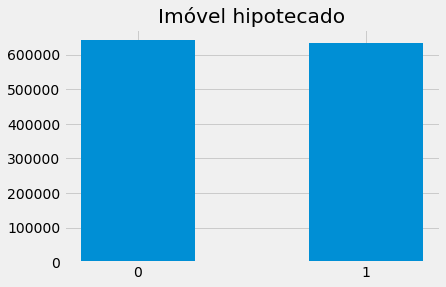

In [291]:
# Aparando a string antes de processar
df_loan['home_ownership'] = df_loan['home_ownership'].apply(lambda val: val.strip())
# função para binarizar
def own_house(v):
    return 1 if v == 'OWN' else 0
# função para binarizar
def mortgage_house(v):
    return 1 if v == 'MORTGAGE' else 0

df_loan['own_house'] = df_loan['home_ownership'].apply(own_house)
df_loan['mortgage_house'] = df_loan['home_ownership'].apply(mortgage_house)

plt.bar(df_loan['mortgage_house'].value_counts().index.astype(str, copy = False), df_loan['mortgage_house'].value_counts().values, width=0.5)
plt.title('Imóvel hipotecado')

#### Propósito de investimento (purpose)
- Consolidação de dívidas: debt_consolidation, credit_card
- Investimento: small_business, renewable_energy, educational
- Aquisição: home, car, home_improvement
- Saude: medical
- Outros: other, moving, vacation, wedding

In [292]:
# Aparando a string antes de processar
df_loan['purpose'] = df_loan['purpose'].apply(lambda val: val.strip())
# funções para binarizar
def consolidation_purpose(v):
    return 1 if v in ['debt_consolidation', 'credit_card'] else 0
def investment_purpose(v):
    return 1 if v in ['small_business', 'renewable_energy', 'educational'] else 0
def aquisiton_purpose(v):
    return 1 if v in ['home', 'car', 'home_improvement'] else 0
def health_purpose(v):
    return 1 if v in ['medical'] else 0
def other_purpose(v):
    return 1 if v in ['other', 'moving', 'vacation', 'wedding', 'major_purchase'] else 0

df_loan['consolidation_purpose'] = df_loan['purpose'].apply(consolidation_purpose)
df_loan['investment_purpose'] = df_loan['purpose'].apply(investment_purpose)
df_loan['aquisiton_purpose'] = df_loan['purpose'].apply(aquisiton_purpose)
df_loan['health_purpose'] = df_loan['purpose'].apply(health_purpose)
df_loan['other_purpose'] = df_loan['purpose'].apply(other_purpose)

df_loan[['purpose','consolidation_purpose','investment_purpose', 'aquisiton_purpose', 'health_purpose', 'other_purpose']].head()

,purpose,consolidation_purpose,investment_purpose,aquisiton_purpose,health_purpose,other_purpose
id,,,,,,
68407277,debt_consolidation,1,0,0,0,0
68355089,small_business,0,1,0,0,0
68341763,home_improvement,0,0,1,0,0
68476807,major_purchase,0,0,0,0,1
68426831,debt_consolidation,1,0,0,0,0


In [293]:
df_loan['purpose'].value_counts()

debt_consolidation    745866
credit_card           284735
home_improvement       82647
other                  72013
major_purchase         26378
medical                14513
small_business         12625
car                    12431
moving                  8652
vacation                8482
house                   6584
wedding                  878
renewable_energy         791
educational                1
Name: purpose, dtype: int64

#### Tempo de serviço (emp_length)

In [294]:
# Tempo de serviço (emp_length)
df_loan['emp_length'].value_counts()

10+ years    425256
2 years      114669
3 years      101348
< 1 year     101046
1 year        83244
5 years       78325
4 years       74840
6 years       58486
8 years       58003
7 years       56281
9 years       48645
Name: emp_length, dtype: int64

In [295]:
df_loan['emp_length']= df_loan['emp_length'].map(str)
df_loan['emp_length'] = df_loan['emp_length'].apply(lambda val: val.strip())
# função para transformar categoria em numero
def handle_emp_length(x):
    return {
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'None': 0
    }.get(x, 0)
        
df_loan['emp_length'] = df_loan['emp_length'].apply(handle_emp_length)
df_loan['emp_length']

id
68407277    10
68355089    10
68341763    10
68476807     3
68426831     4
            ..
89905081     5
88948836     9
89996426     3
90006534    10
88224441     6
Name: emp_length, Length: 1276596, dtype: int64

### debt_settlement_flag

In [296]:
# Aparando a string antes de processar
df_loan['debt_settlement_flag'] = df_loan['debt_settlement_flag'].apply(lambda val: val.strip())
# função para binarizar
def handle_debt(v):
    return 1 if v == 'Y' else 0

df_loan['debt_settlement_flag'] = df_loan['debt_settlement_flag'].apply(handle_debt)

df_loan[['debt_settlement_flag']].head()

,debt_settlement_flag
id,
68407277,0
68355089,0
68341763,0
68476807,0
68426831,0


### Excluindo variáveis categóicas que foram tratadas

In [297]:
df_loan.select_dtypes(['string']).columns

Index([], dtype='object')

### 6.3 Novas variáves 
- tax_bal_loan = saldo em banco / valor do empréstimo
- month_inc = salário anual / 12
- tax_inst_inc = insatalments / month_inc (% que a parcela representa do seu salário mensal)
- delinq_past : delinq_amnt > 0 (já foi inadimplente)

In [395]:
#tax_bal_loan
df_loan['tax_bal_loan'] = round(df_loan['tot_cur_bal']/df_loan['funded_amnt'],6)
df_loan[['funded_amnt','tot_cur_bal', 'tax_bal_loan', 'loan_condition']]

,funded_amnt,tot_cur_bal,tax_bal_loan,loan_condition
id,,,,
68407277,3600.0,144904.0,40.251111,1
68355089,24700.0,204396.0,8.275142,1
68341763,20000.0,189699.0,9.484950,1
68476807,10400.0,331730.0,31.897115,1
68426831,11950.0,12798.0,1.070962,1
...,...,...,...,...
89905081,18000.0,168758.0,9.375444,1
88948836,29400.0,663465.0,22.566837,1
89996426,32000.0,408701.0,12.771906,0


In [374]:
#month_inc
df_loan['month_inc'] = round(df_loan['annual_inc']/12,2)
df_loan[['annual_inc','month_inc', 'installment']].describe().

array([[1.27659600e+06, 1.27659600e+06, 1.27659600e+06],
       [7.58878255e+04, 6.32398549e+03, 4.41928690e+02],
       [4.88437180e+04, 4.07030982e+03, 2.62286442e+02],
       [0.00000000e+00, 0.00000000e+00, 4.93000000e+00],
       [4.60000000e+04, 3.83333000e+03, 2.51400000e+02],
       [6.50000000e+04, 5.41667000e+03, 3.77410000e+02],
       [9.08000000e+04, 7.56667000e+03, 5.86240000e+02],
       [8.70000000e+05, 7.25000000e+04, 1.71983000e+03]])

In [394]:
#tax_loan_inc
df_loan['tax_loan_inc'] = round(df_loan['funded_amnt']/df_loan['annual_inc'],6)
df_loan[['funded_amnt', 'annual_inc','tax_loan_inc']]

,funded_amnt,annual_inc,tax_loan_inc
id,,,
68407277,3600.0,55000.0,0.065455
68355089,24700.0,65000.0,0.380000
68341763,20000.0,63000.0,0.317460
68476807,10400.0,104433.0,0.099585
68426831,11950.0,34000.0,0.351471
...,...,...,...
89905081,18000.0,130000.0,0.138462
88948836,29400.0,180792.0,0.162618
89996426,32000.0,157000.0,0.203822


In [379]:
#tax_inst_inc
df_loan['tax_inst_inc'] = round(df_loan['installment']/df_loan['month_inc'],6)
df_loan[['annual_inc','month_inc', 'installment', 'tax_inst_inc']]
#sns.distplot(df_loan['tax_inst_inc'])
df_loan['tax_inst_inc'].describe()

count    1.276596e+06
mean              inf
std               NaN
min      5.920000e-04
25%      4.670300e-02
50%      7.256200e-02
75%      1.057960e-01
max               inf
Name: tax_inst_inc, dtype: float64

<AxesSubplot:xlabel='tax_inst_inc'>

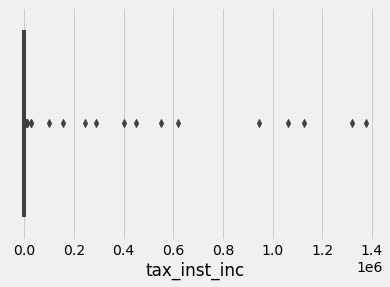

In [302]:
sns.boxplot(df_loan['tax_inst_inc'])

In [383]:
df_loan[['month_inc', 'installment']].head()

tax_inst_inc       0.087401
month_inc       5357.216000
installment      414.212000
dtype: float64

In [382]:
df_loan['tax_inst_inc'].mean()
x[numpy.isneginf(x)] = 0

inf

In [384]:
np.isposinf(df_loan['tax_inst_inc'].mean())

True

In [396]:
# Função para tratar valores infinitos em taxas
def handle_inf_tax(val):
    if (np.isposinf(val)) or (val >= 1):
        return 1
    if (np.isneginf(val)) or (val <= 0):
        return 0
    return val

In [398]:
# tratando taxas infinitas para 0 ou 1
df_loan['tax_inst_inc'] = df_loan['tax_inst_inc'].map(handle_inf_tax)
df_loan['tax_loan_inc'] = df_loan['tax_loan_inc'].map(handle_inf_tax)
df_loan['tax_bal_loan'] = df_loan['tax_bal_loan'].map(handle_inf_tax)

In [303]:
#delinq_past
def delinq_past(v):
    return 1 if v > 0  else 0
df_loan['delinq_past'] = df_loan['delinq_amnt'].apply(delinq_past)
df_loan[['delinq_amnt','delinq_past']].head()

,delinq_amnt,delinq_past
id,,
68407277,0.0,0
68355089,0.0,0
68341763,0.0,0
68476807,0.0,0
68426831,0.0,0


In [304]:
df_loan.shape

(1276596, 80)

Agora estamos com **108 variáveis** (18 novas)

## 7 - Tratamento de Valores Faltantes 
- Preenchimento de valores (mediana, zero e conhecimento local);
- Exclusão de variáveis (se necessário)

### 7.1 Identificação

In [305]:
df_loan.shape

(1276596, 80)

In [306]:
# Identificando as variáves com dados faltantes
show_nulls = df_loan.isnull().sum().sort_values(axis=0, ascending=False)
print(len(show_nulls[show_nulls.values > 0]))
show_nulls[show_nulls.values > 0]

21


il_util             811978
all_util            739635
total_cu_tl         739603
open_acc_6m         739603
open_act_il         739602
inq_fi              739602
max_bal_bc          739602
open_rv_24m         739602
open_rv_12m         739602
total_bal_il        739602
open_il_24m         739602
open_il_12m         739602
bc_util              14236
percent_bc_gt_75     13913
bc_open_to_buy       13501
cat_funded_amnt       5302
cat_rate               907
revol_util             713
dti                    374
pct_tl_nvr_dlq         154
num_rev_accts            1
dtype: int64

Após analisarmos as variáveis com dados faltantes, categorizamos elas:
- Excluír (pois não tem relevância  para o modelo)
- Imputar dados faltantes
    - Com zero
    - Com mediana
    - Com regra específica

### 7.2 Imputação de dados

In [307]:
# Variáveis que serão excluídas / imputadas
imputar_especifico = ['cat_rate']
imputar_mediana = ['total_bal_il']
imputar_zero = ['il_util', 'all_util', 'total_cu_tl', 'open_acc_6m', 'open_act_il', 'max_bal_bc',
               'open_il_12m', 'open_il_24m', 'inq_fi', 'open_rv_12m', 'open_rv_24m', 'bc_util',
               'percent_bc_gt_75', 'bc_open_to_buy', 'dti', 'pct_tl_nvr_dlq', 'num_rev_accts', 'revol_util']
print(len(imputar_mediana)+len(imputar_zero)+len(imputar_especifico))

20


In [308]:
## Com zero
df_loan[imputar_zero] = df_loan[imputar_zero].fillna(0)

In [309]:
## Com mediana
df_loan['total_bal_il'] = df_loan['total_bal_il'].fillna(df_loan['total_bal_il'].median())

In [310]:
## Regras específicas
#categoricos
df_loan['cat_rate'] = df_loan['cat_rate'].fillna('baixo')

In [311]:
show_nulls = df_loan.isnull().sum().sort_values(axis=0, ascending=False)
nulos = show_nulls[show_nulls.values > 0]
nulos

cat_funded_amnt    5302
dtype: int64

In [312]:
df_loan.shape

(1276596, 80)

## 8 - Análise Multivariada
Nesta etapa vamos analisar a influência de algumas variáveis com o alvo

#### Funções de plotagem

In [313]:
# Função genérica para pltar gráfico de violino hue
def plot_violin_hue(df, x, hue, colors, x_label, y_label):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(16,8))
    sns.despine(left=True)
    g = sns.violinplot(x=df[x], y=df[hue], split=True, palette=colors) #Violin Plot
    g.set_title(y_label+" por "+x_label, fontsize=20, pad=20)
    g.set_xlabel(x_label, fontsize=16)
    g.set_ylabel(y_label, fontsize=16)
    plt.show()

In [314]:
#Função genérica para gráfico de barras com multiplas categorias
def fnc_countplot(x, hue, df):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,8))
    sns.despine(left=True)

    g = sns.countplot(x=df[x], hue=df[hue], palette=['r',"g"], alpha=0.8)
    g.set_title(x+" e "+hue, fontsize=20, pad=20)
    g.set_xlabel("Categoria", fontsize=16)
    g.set_ylabel("Quantidade", fontsize=16)
    g.legend(loc='upper right')

    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 0.2,
                '{:.0f}'.format(height),
                ha="center", fontsize=16) 
    plt.show()

In [367]:
# Função para mostrar a taxa de maus pagadores
def plot_bad_loans_tax(df, var, target, outputs, labels):
    df_agg = df.groupby([var,target]).size()
    bom_arr = []
    mau_arr = []
    rate_arr = []
    for g in outputs:
        bom_arr.append(df_agg.loc[(g,1)])
        mau_arr.append(df_agg.loc[(g,0)])
        tax = round(df_agg.loc[(g,0)]*100/df_agg.loc[(g,1)],2)
        rate_arr.append(tax)
        print(g,' --> ',tax,'%')
    # Plotando gráfico de barras com a linha da taxa de maus pagadores
    df_plot = pd.DataFrame({
     'bom' : bom_arr,
     'mau' : mau_arr,
     'rate' : rate_arr})
    width = .5
    df_plot[['mau','bom']].plot(kind='bar', width = width, color = ['tomato', 'green'], figsize=(16,8))
    plt.ylabel('Empréstimos')
    plt.xlabel('Categoria')
    plt.title('Análise da taxa de maus pagadores por categoria')
    plt.legend(loc=3)
    #linha da taxa
    df_plot['rate'].plot(secondary_y=True, color='red', label='% Maus pagadores')
    plt.ylabel('% Maus pagadores')
    plt.ylim(0,100)
    plt.legend(loc=5)
    
    plt.show()

### 8.1 Atributo alvo (loan_condition)

#### Valor do empréstimo

Média (bom):  14254
Média (ruim):  15656


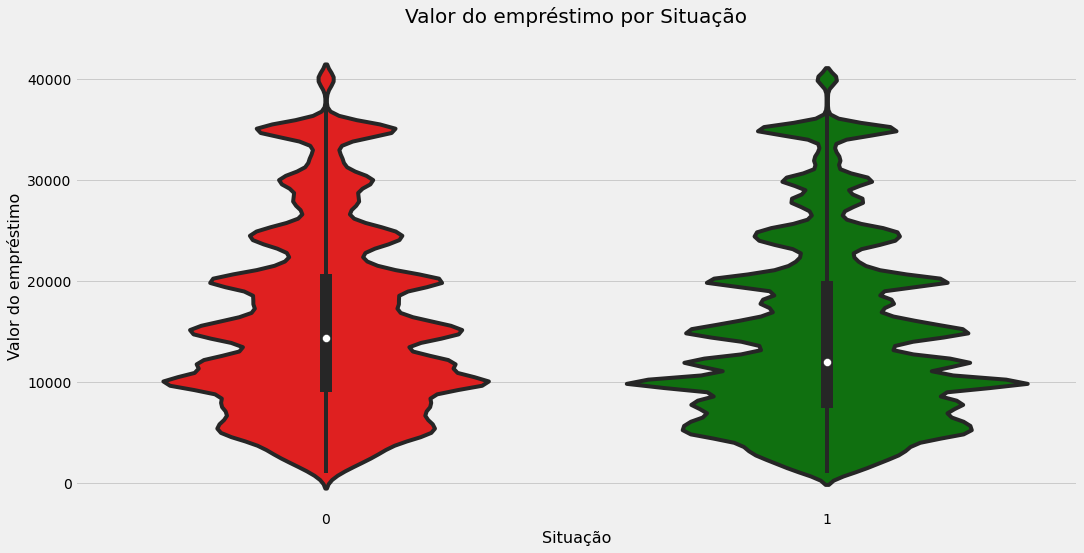

In [316]:
# Valor do empréstimo pela situação
media_bom = round(df_loan[df_loan['loan_condition']==1]['funded_amnt'].mean())
media_ruim = round(df_loan[df_loan['loan_condition']==0]['funded_amnt'].mean())
print('Média (bom): ',media_bom)
print('Média (ruim): ',media_ruim)
plot_violin_hue(df_loan, 'loan_condition', 'funded_amnt', ['r','g'], 'Situação', 'Valor do empréstimo')

No gráfico de violina acima, podemos percebo que existem um **volume maior de bons pagadores** para os **valores mais baixos de empréstimos.**

#### Taxa de juros

Média (bom):  12.65
Média (ruim):  15.76


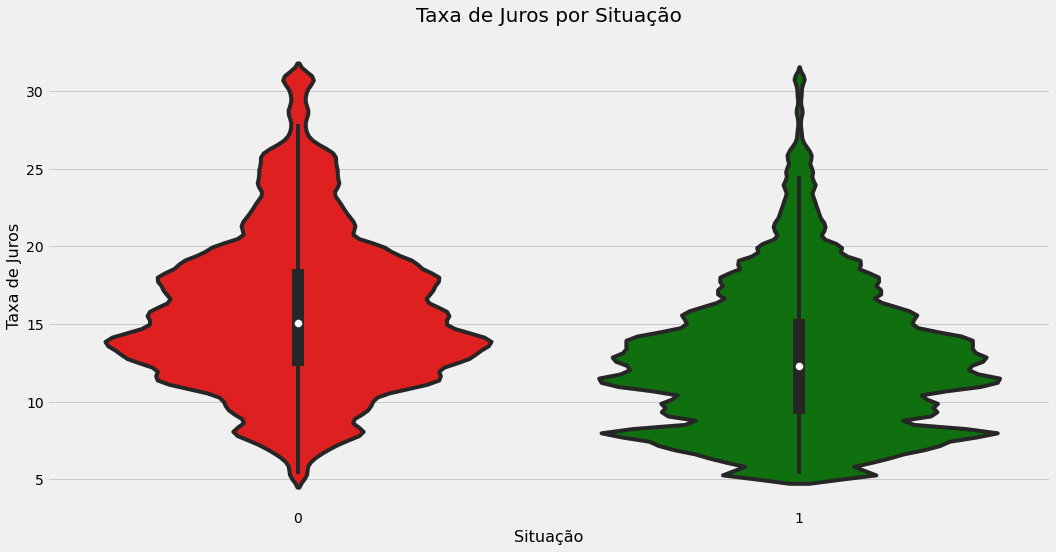

In [317]:
# Taxa de Juros pela situação
media_bom = round(df_loan[df_loan['loan_condition']==1]['int_rate'].mean(),2)
media_ruim = round(df_loan[df_loan['loan_condition']==0]['int_rate'].mean(),2)
print('Média (bom): ',media_bom)
print('Média (ruim): ',media_ruim)
# Plotando gráfico
plot_violin_hue(df_loan, 'loan_condition', 'int_rate', ['r','g'], 'Situação', 'Taxa de Juros')

No gráfico de violina acima, ao comparar a taxa de juros com o atributo alvo.
<br>Notamos que o volume de bom pagador **é maior quando a taxa de juros é menor.**
<br>Além disso, a média da taxa de juros dos bom pagador é mais de **3% a menos** qua taxa de juros do maus pagadores.

#### Grau social (grade)

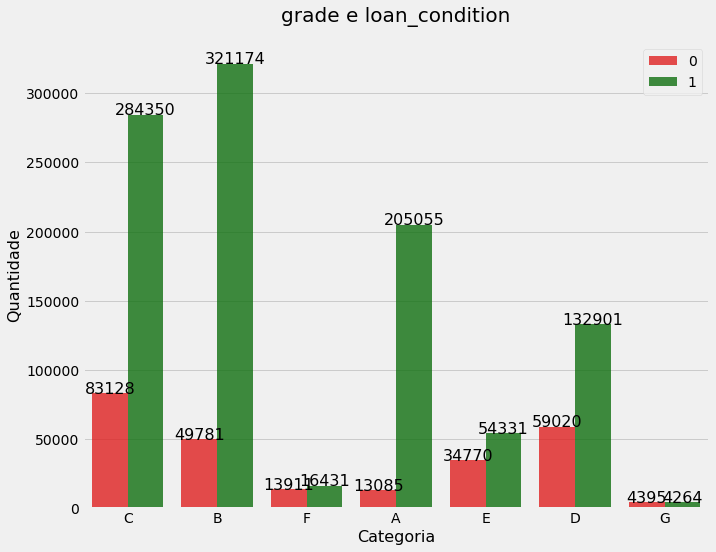

In [318]:
# Grau social pela situação do empréstimo
fnc_countplot('grade', 'loan_condition', df_loan)

Na visualização acima, notamos que da **categoria A até C tende a ter um número
maior de bons pagadores**,
<br>mas não temos uma taxa que possa comprovar isso.
<br>Portanto, a seguir vamos calcular a taxa de maus pagadores por categoria.

A  -->  6.38 %
B  -->  15.5 %
C  -->  29.23 %
D  -->  44.41 %
E  -->  64.0 %
F  -->  84.66 %
G  -->  103.07 %


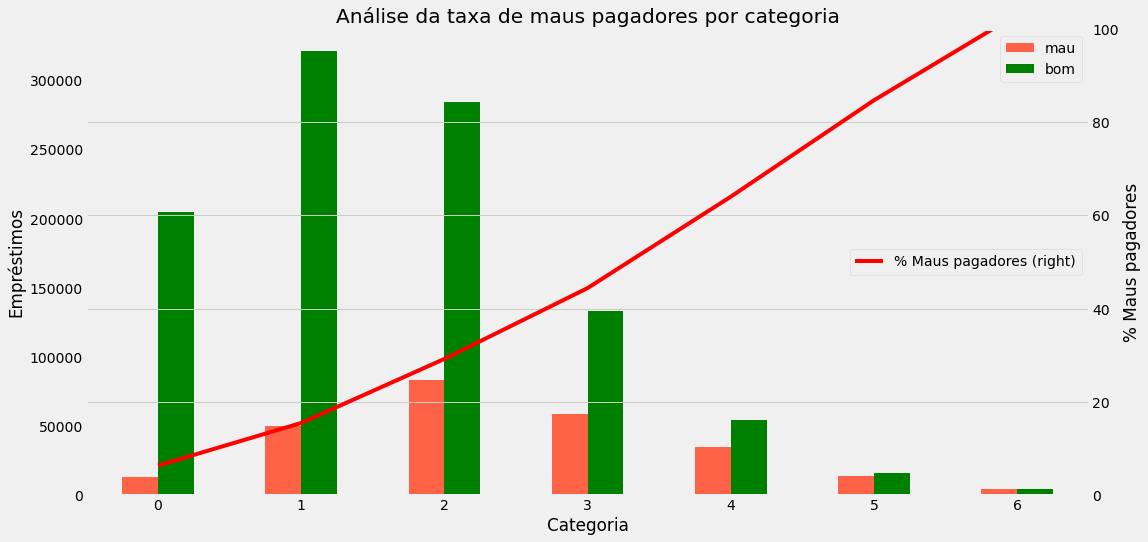

In [369]:
# Análise da taxa de maus pagadores
plot_bad_loans_tax(df_loan, 'grade', 'loan_condition', ['A','B','C','D','E','F','G'], ['A','B','C','D','E','F','G'])

No gráfico acima, com a taxa de maus pagadores, fica claro que conforme **aumenta o grau social maior é a taxa de maus pagadores.**
<br> Assim a variável **confiable_grade** criada anteriormente, consegue resumir isso de maneira **binária.**

#### Propósito (investimento e pagamento de débitos)

0  -->  25.17 %
1  -->  43.15 %


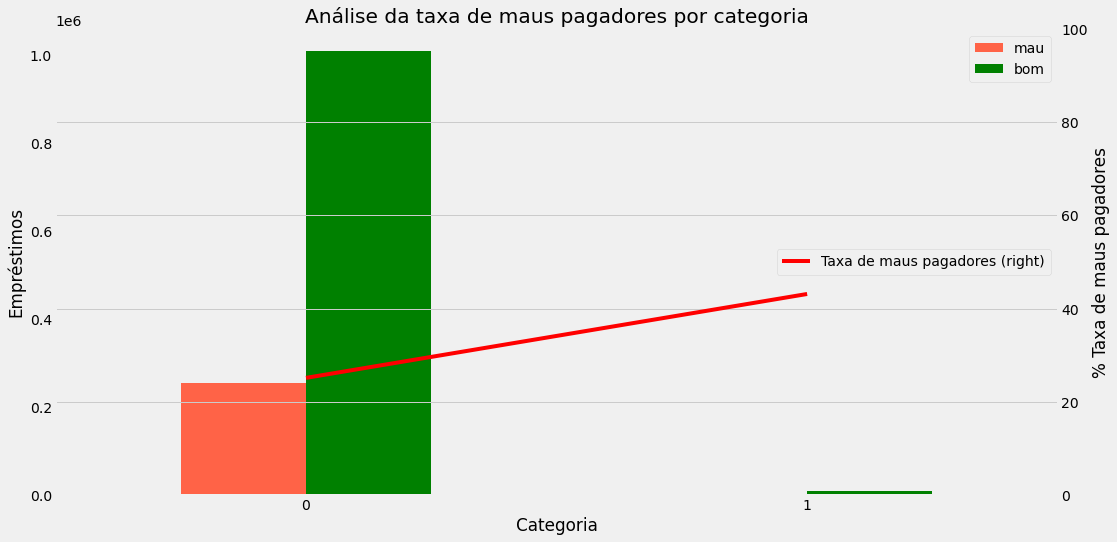

In [362]:
# Casa própria pela situação do empréstimo
plot_bad_loans_tax(df_loan, 'investment_purpose', 'loan_condition', [0,1], ['Não investimento', 'Investimento'])

Ao analisarmos o gráfico acima, notamos que mesmo o tendo uma valor baixo, a variável investment_purpose possui **alta relevância na representação de maus pagadores (41%).**

0  -->  25.5 %
1  -->  25.3 %


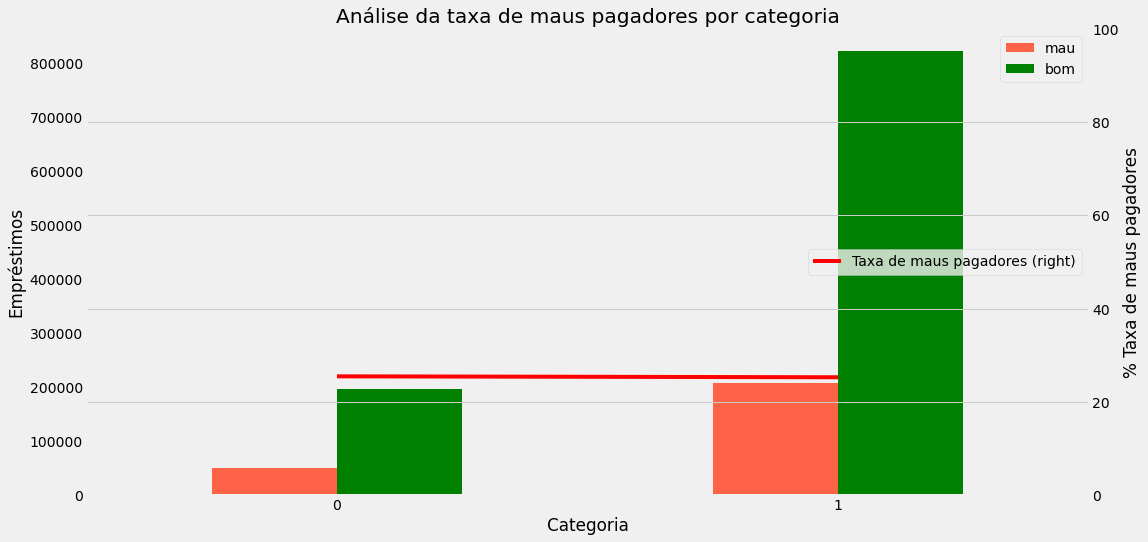

In [364]:
plot_bad_loans_tax(df_loan, 'consolidation_purpose', 'loan_condition', [0,1], ['Outros', 'Pagamento de débitos'])

No gráfico, é possível nota que não há diferença na taxa de maus pagadores com relaçõa ao propósito de pagamento de débitos **(ambos com 24%).**

#### Faixa salarial (income_category)

0  -->  29.98 %
1  -->  23.47 %
2  -->  17.32 %


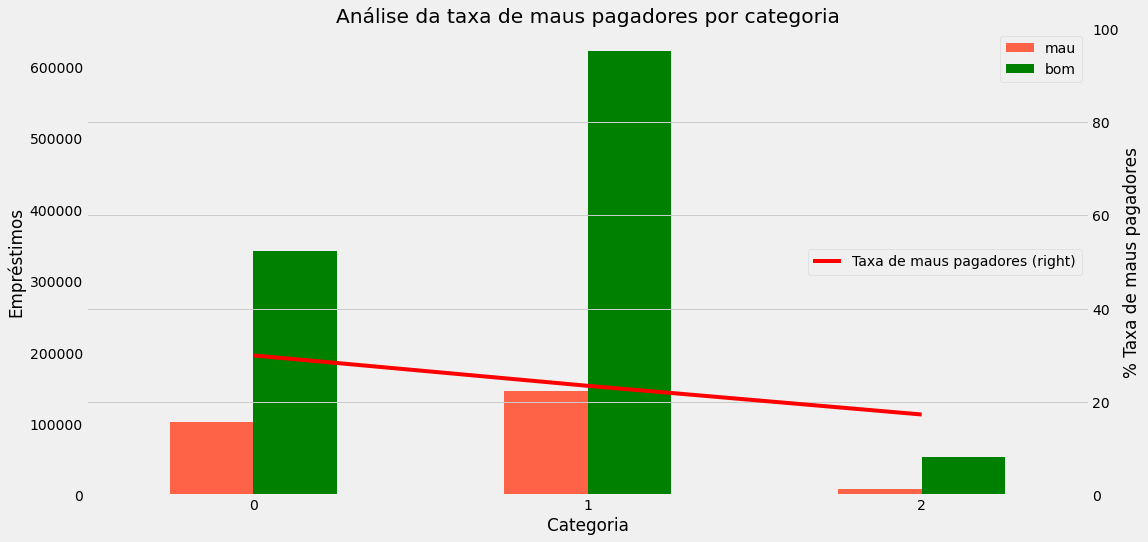

In [365]:
plot_bad_loans_tax(df_loan, 'income_category', 'loan_condition', [0, 1, 2], ['Baixa', 'Média', 'Alta'])

No gráfico acima, notamos que **quanto maior a renda anual** (categoricamente) **menor a taxa de maus pagadores.**

#### Casa própria/hipoteca

0  -->  25.23 %
1  -->  26.24 %


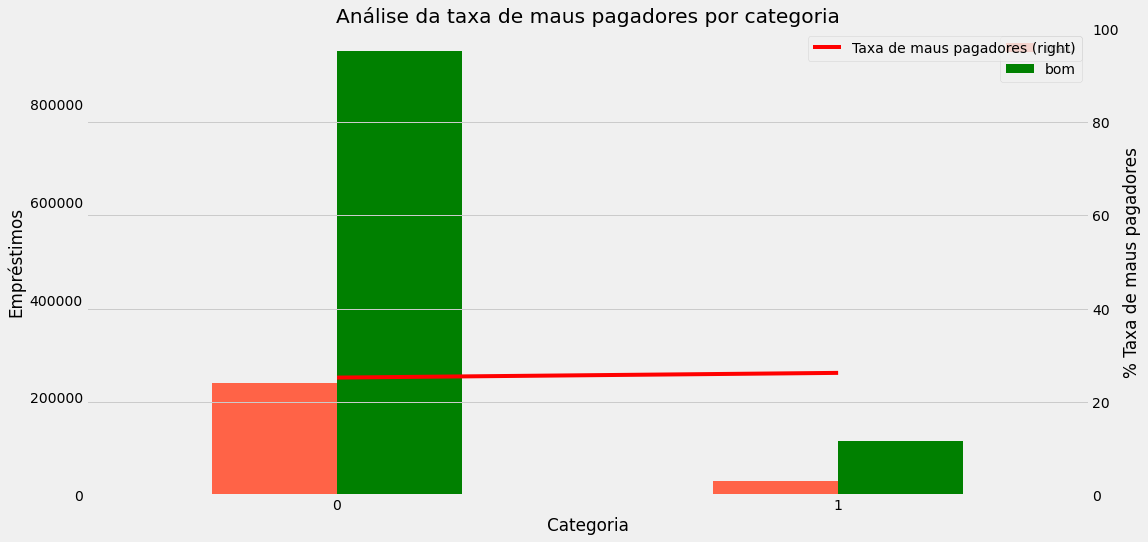

In [359]:
plot_bad_loans_tax(df_loan, 'own_house', 'loan_condition', [0,1], ['Outro', 'Casa própria'])

0  -->  29.94 %
1  -->  21.0 %


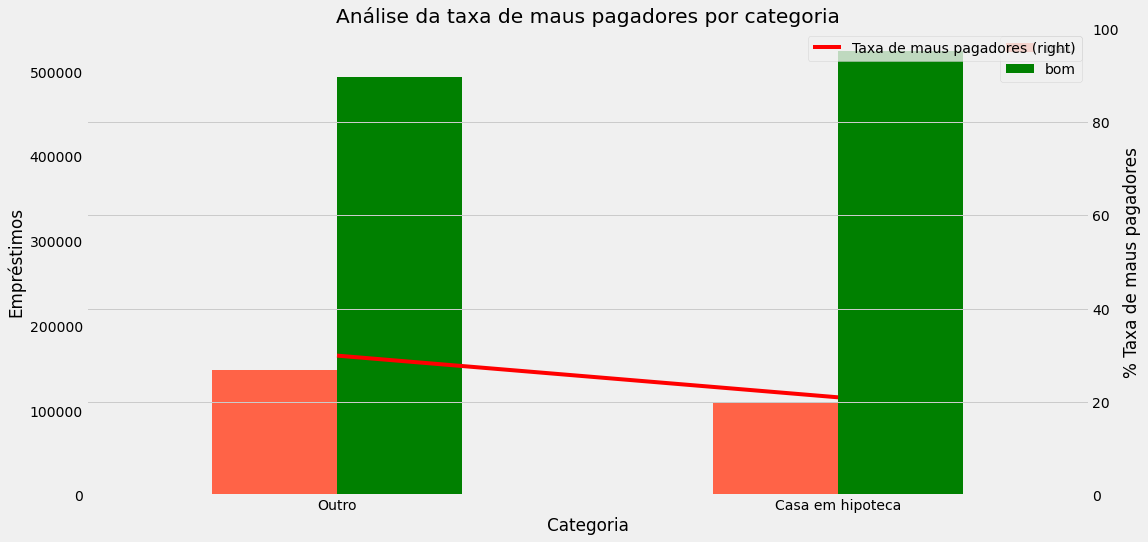

In [324]:
plot_bad_loans_tax(df_loan, 'mortgage_house', 'loan_condition', [0,1], ['Outro', 'Casa em hipoteca'])

Com relação as avariáveis que envolvem o imóvel, é possível notar que a casa própria não influencia na taxa de maus pagadores, mas a casa em hipoteca sim. Isso deve ocorrer pelo fato dos pagadores estrem com risco de perder seu imóvel se não pagar a dívida.

### 8.2  Variáveis preditoras
- Faixa de salário X Valor do empréstimo
- Juros x Valor do empréstimo
- Parcela x salário mensal

#### Faixa de salário X Valor do empréstimo

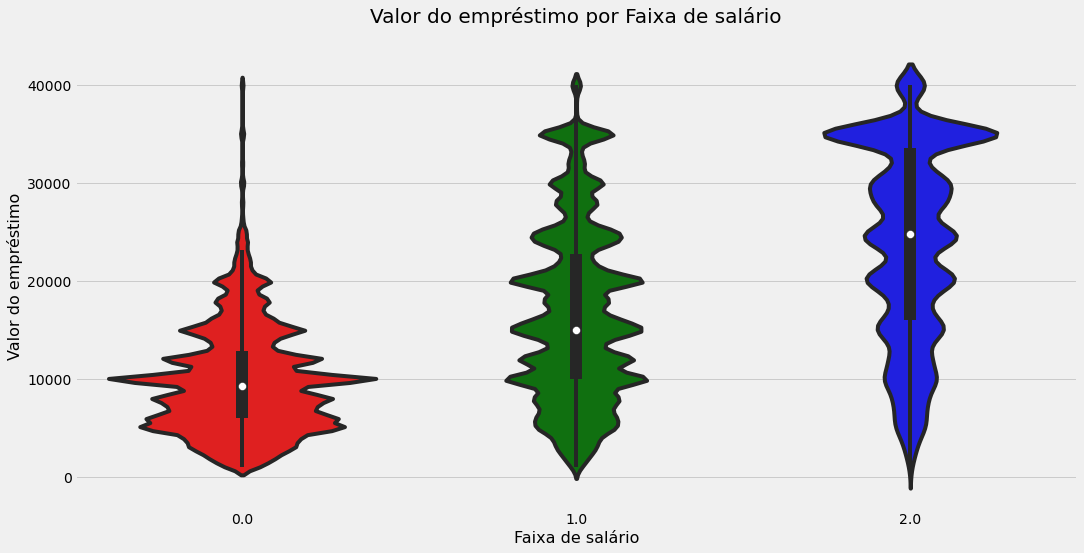

In [325]:
# Faixa de renda por Valor do empréstimo
plot_violin_hue(df_loan, 'income_category', 'funded_amnt', ['r','g','b'], 'Faixa de salário', 'Valor do empréstimo')

#### Juros x Valor do empréstimo

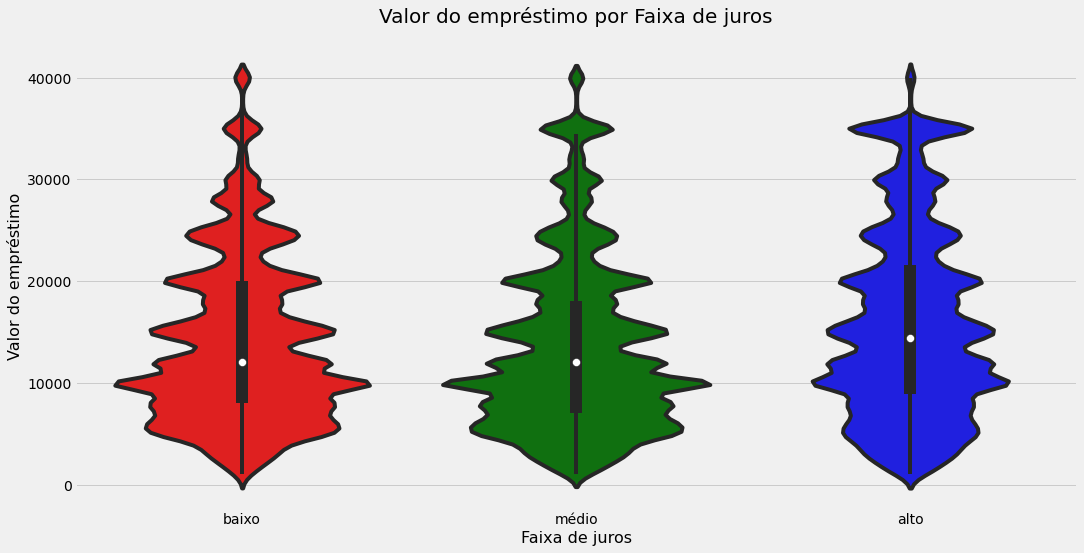

In [326]:
# Gráfico de violino
plot_violin_hue(df_loan, 'cat_rate', 'funded_amnt', ['r','g','b'], 'Faixa de juros', 'Valor do empréstimo')

No gráfico de violino acima, nota-se que em geral, **as taxas de juros mais altas estão sobre os mais altos valores de empréstimos (levemente).**

#### Tempo de contrato

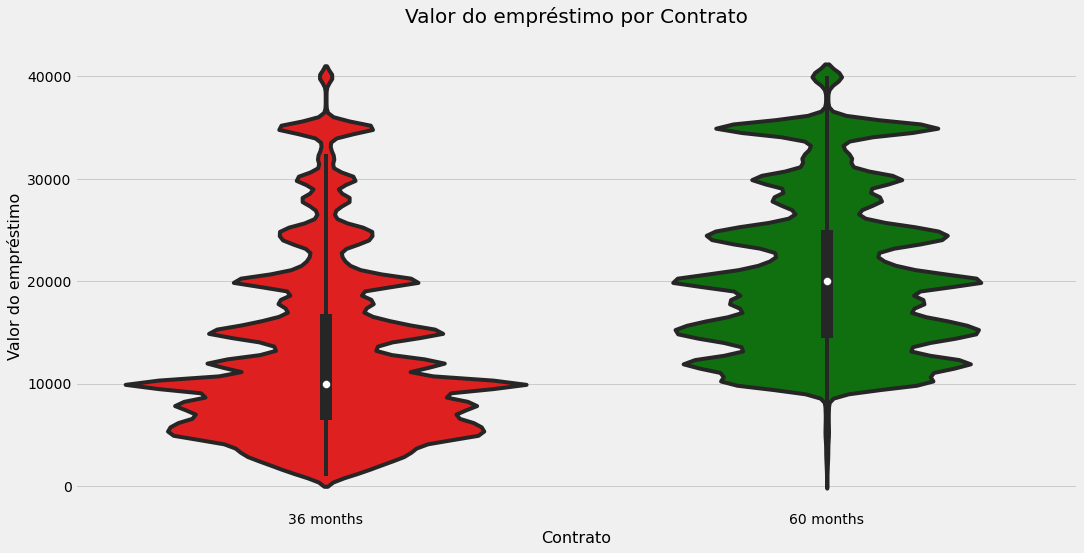

In [327]:
# Contrato x Valor do empréstimo
plot_violin_hue(df_loan, 'term', 'funded_amnt', ['r','g','b'], 'Contrato', 'Valor do empréstimo')

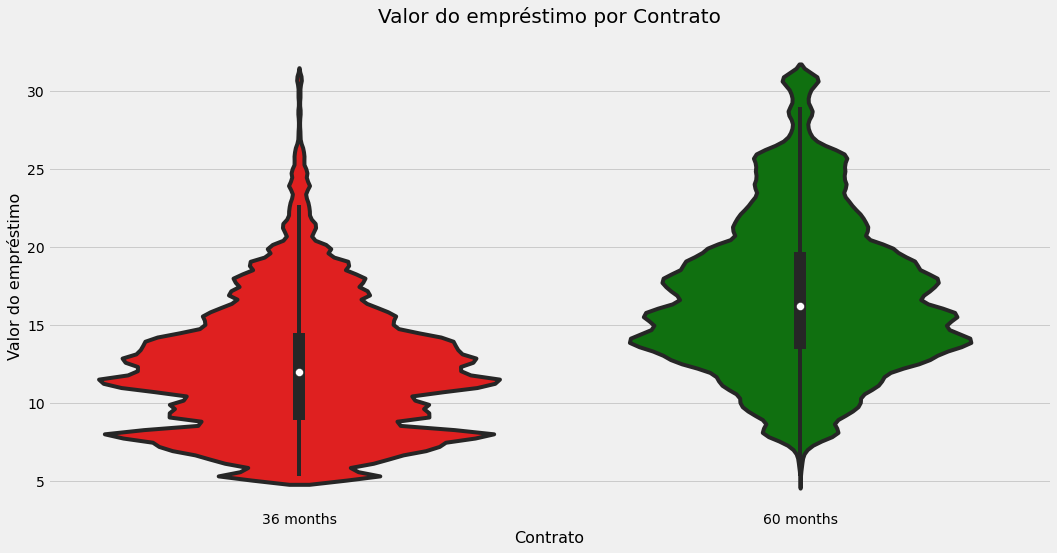

In [328]:
# Contrato x Juros
plot_violin_hue(df_loan, 'term', 'int_rate', ['r','g','b'], 'Contrato', 'Valor do empréstimo')

Nos dois gráficos de violino acima, notamos claramente que quanto o tempo de contrato está relacionado com o valor do empréstimo e a taxa de juros.
<br> **Quando maior a taxa de juros e o valor, maior a tendência de ser contrato para 60 meses.**

## 9 - Análise de Correlação
Nesta etapa vamos analisar a correlação das variáveis com o atributo alvo e a coliearidade que elas tem entre si.

### Colinearidade
A colinearidade é um problema muito grande, porque aumenta a variância do modelo (principalmente para modelos lineares), aumenta o número de dimensões sem aumentar a informação e, além disso, distorce a capacidade de explicar um modelo. 
<br>Se dois recursos são colineares, **deve ser considerado apenas a variável mais informativa.**

### 9.1 Correlação de Pearson

In [329]:
corr_target = df_loan.corr(method='pearson', min_periods=1)['loan_condition'].sort_values(ascending=False)
positive_cor = corr_target[corr_target.values>=0].index
negative_cor = corr_target[corr_target.values<0].index
print(len(positive_cor))
print(len(negative_cor))

29
43


In [330]:
#Correalação Positiva
corr_target[corr_target.values>=0]

loan_condition                1.000000
high_grade                    0.176423
fico_range_low                0.128334
fico_range_high               0.128333
bc_open_to_buy                0.081749
avg_cur_bal                   0.080662
tax_bal_loan                  0.079963
tot_hi_cred_lim               0.079027
mort_acc                      0.075938
total_bc_limit                0.072327
tot_cur_bal                   0.071469
mortgage_house                0.070782
annual_inc                    0.059483
month_inc                     0.059483
total_rev_hi_lim              0.057991
income_category               0.056573
emp_length                    0.031078
revol_bal                     0.021351
aquisiton_purpose             0.017688
num_bc_tl                     0.017381
total_acc                     0.012525
pct_tl_nvr_dlq                0.010375
num_rev_accts                 0.005096
total_bal_ex_mort             0.003352
consolidation_purpose         0.001222
total_il_high_credit_limi

### Correlação Positiva

In [331]:
# Particionar para melhor visualização
pos1 = list(positive_cor[0:14])
pos2 = list(positive_cor[14:28])
pos2.insert(0,positive_cor[0])

<AxesSubplot:>

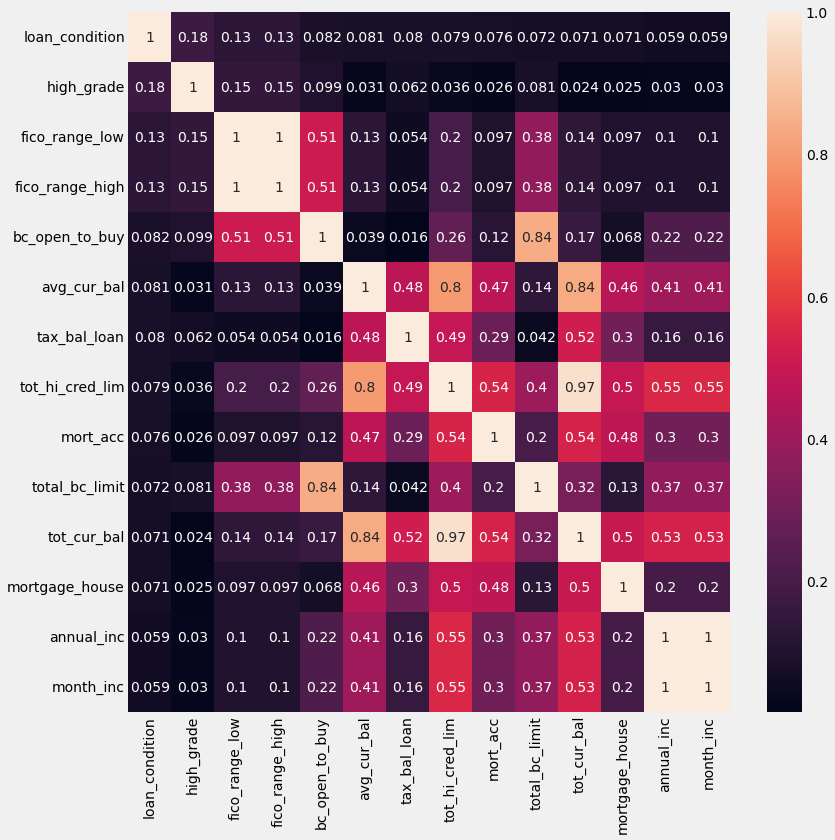

In [332]:
#Pearson correlation (positiva 1)
plt.figure(figsize=(12,12))
sns.heatmap(df_loan[pos1].corr(), annot=True, square=False)

Primeiramente vamos listar as variáveis que mais tiveram correlação positiva com o atributo alvo:
- confiable_grade (0.18)
- fico_range_low  (0.13)
- fico_range_high (0.13)       
- bc_open_to_buy  (0.08)          
- avg_cur_bal     (0.08)           
- tax_bal_loan    (0.08)            
- tot_hi_cred_lim (0.08)            
- mort_acc        (0.08)            
- total_bc_limit  (0.07)             
- tot_cur_bal     (0.07)              
- mortgage_house  (0.07)             

Agora vamos listar as variáveis colineares (>=0.9)
- fico_range_low / fico_range_high
- annual_inc / month_inc
- total_hi_cred_lim / tot_cur_bal

As variáveis colineares podemos excluir uma, para evitar duplicidade de informações. 

Agora vamos analisar algumas correlações interessantes:
- bc_open_to_buy / total_bc_limit (0.84)
- tot_cur_bal / avg_cur_bal  (0.84)
- tot_hi_cred_lim / avg_cur_bal (0.8)

Ao analisar notamos que é sugestível excluir as variáveis:
- fico_range_low (colinear)
- month_inc (colinear)
- total_hi_cred_lim (colinear)
- avg_cur_bal (alta correlação com a tot_cur_bal)
- bc_open_to_buy (alta correlação com a total_bc_limit)


<AxesSubplot:>

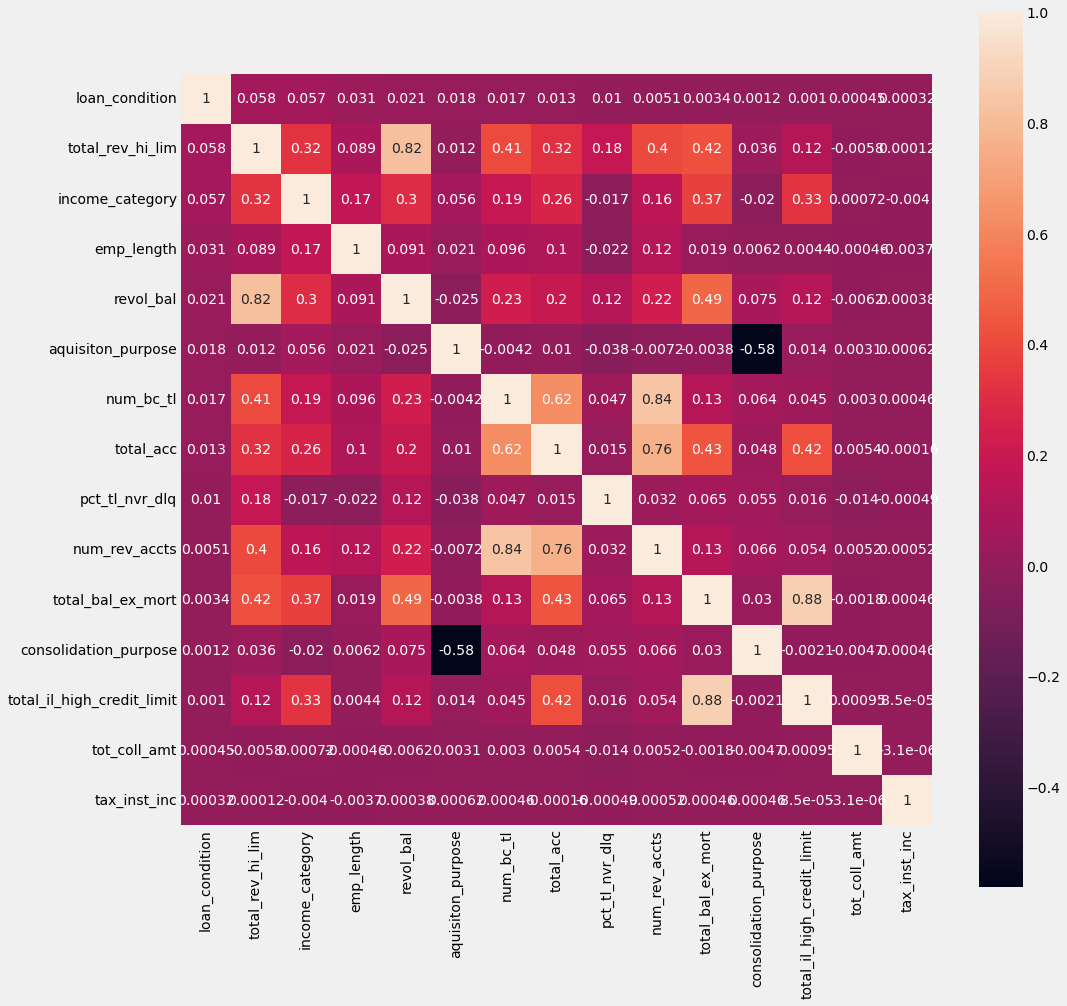

In [333]:
#Pearson correlation (positiva 2)
plt.figure(figsize=(15,15))
sns.heatmap(df_loan[pos2].corr(), annot=True, square=True)

Ao analisar o gráfico de correlação de pearson acima, notamos que essas variávei possuem baixa correlação com o atributo alvo.

Outro ponto, é que para este conjunto de variáveis só temos uma caso de colinearidade (>=0.9):
- tax_inst_inc / tax_loan_inc (0.98)

Além disso, temos algumas correlações interessantes:
- total_rev_hi_lim / revol_bal (0.82)
- aquisiton_purpose / consolidation_purose (-0.58)
- num_bc_tl / total_acc (0.62)
- num_bc_tl / num_rev_accts (0.84)
- total_acc / num_rev_accts (0.76)
- total_bal_ext_mort / total_il_high_credit_limit (0.88)

Assim, ao analisarmos decidimos excluir as seguintes variáveis:
- tax_loan_inc (colinearidade)
- aquisition_purpose (alta correlação negativa)
- num_rev_accts (multicolinear)
- num_bc_tl (multicolinear)
- total_il_high_credit_limit (alta correlação com total_bal_ext_mort)


### Correlação negativa

In [334]:
# Particionar para melhor visualização
# p1
neg1 = list(negative_cor[0:14])
neg1.insert(0,positive_cor[0])
# p2
neg2 = list(negative_cor[14:28])
neg2.insert(0,positive_cor[0]),
# p3
neg3 = list(negative_cor[28:42])
neg3.insert(0,positive_cor[0])

<AxesSubplot:>

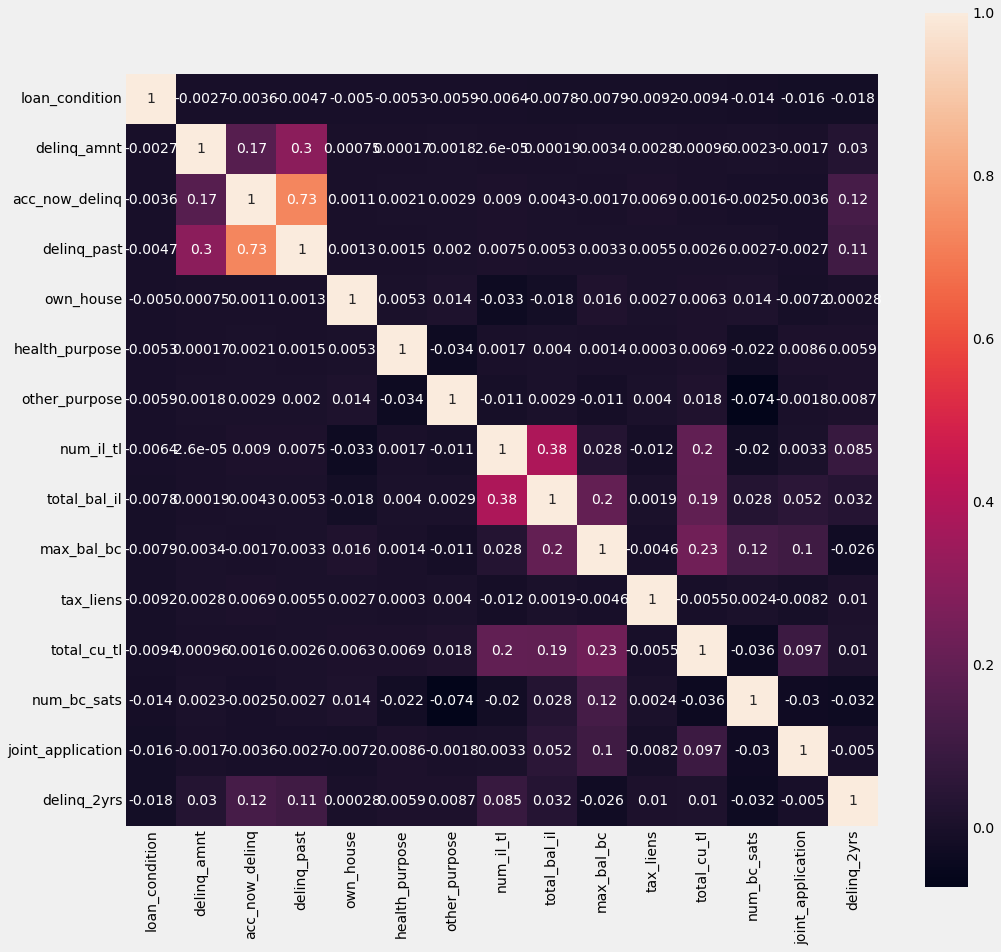

In [335]:
#Pearson correlation (negativa 1)
plt.figure(figsize=(15,15))
sns.heatmap(df_loan[neg1].corr(), annot=True, square=True)

No conjunto de variáveis acima não tivemos nenhum caso de colinearidade.
As correlações mais interessantes são:
- acc_now_relinq / deling_past (0.73)

Pelo motivo de que essas variáveis possuem alta correlação, vamos manter apenas uma delas.
- acc_now_relinq

<AxesSubplot:>

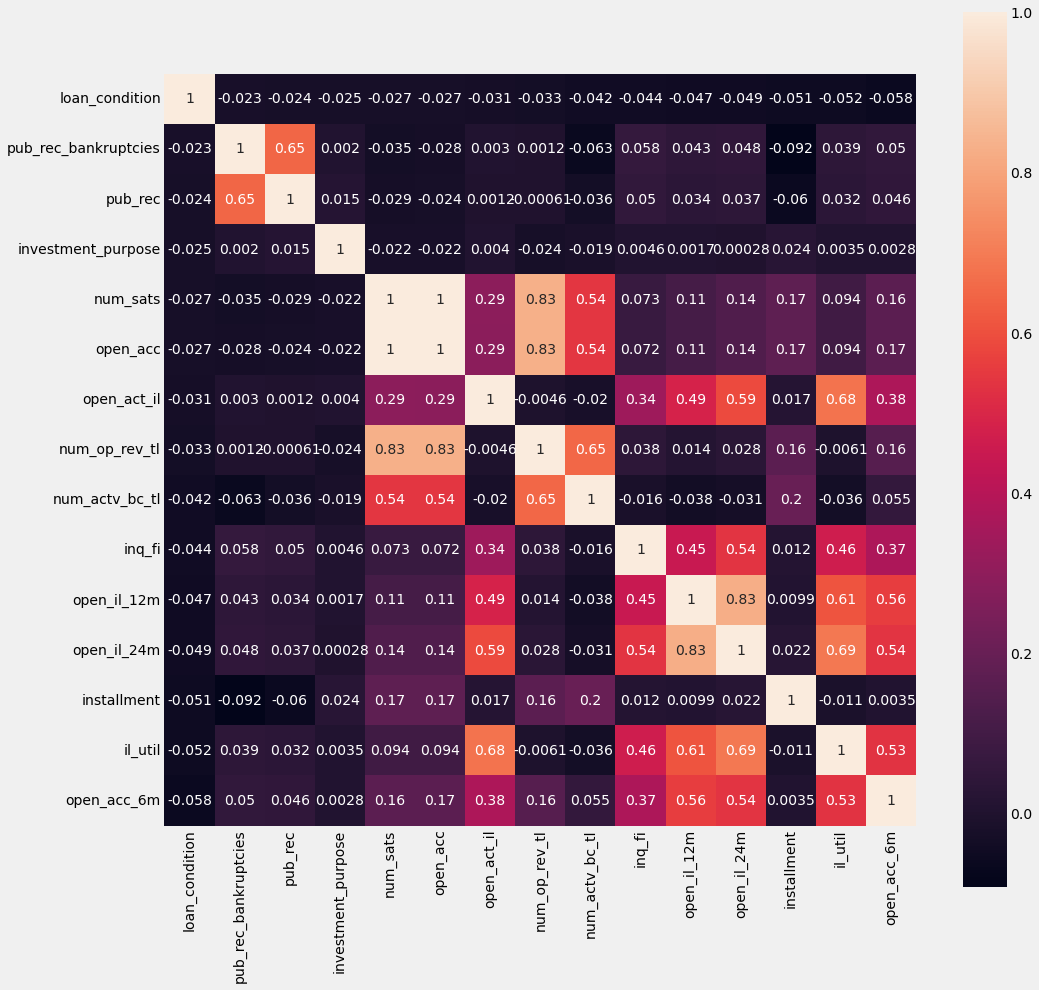

In [336]:
#Pearson correlation (negativa 2)
plt.figure(figsize=(15,15))
sns.heatmap(df_loan[neg2].corr(), annot=True, square=True)

No conjunto de variáveis analisadas com a correlação de pearson acima, temos apenas um caso de colinearidade:
- num_stats / open_acc (1)
E temos algumas correlações interessantes:
- pub_rec / pub_rec_bankkrupticies (0.65)
- open_acc / num_op_rev_tl (0.83)
- open_acc / num_act_bc_tl (0.54)
- num_op_rev_tl / num_act_bc_tl (0.65)
- open_act_il / open_il_12m (0.49)
- open_act_il / open_il_24m (0.59)
- open_act_il / il_util (0.68)
- inq_fi / open_il_24m (0.54)
- open_il_12m / open_il_24m (0.83)
- open_il_12m / open_acc_6m (0.56)
- open_il_12m / il_util (0.61)

Neste caso temos bastante casos de alta correlação, vamos analisar qual a principal variável e focar nela para excluir as demais da multicolinearidade. Neste caso as prinpais variáveis são: open_acc e open_act_il, assim podemos excluir:
- pub_rec_bankkrupticies
- num_op_rev_tl
- num_act_bc_tl
- open_il_12m
- open_il_24m
- il_util

<AxesSubplot:>

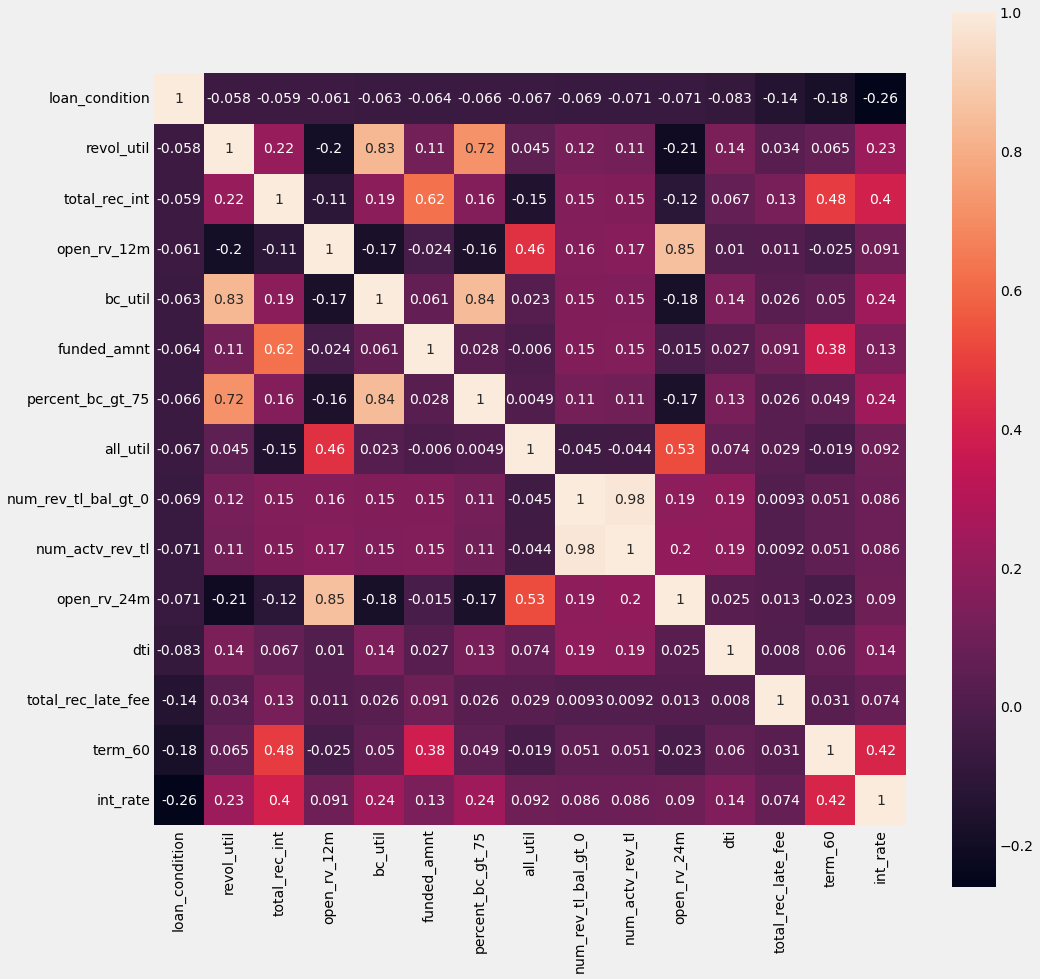

In [337]:
#Pearson correlation (negativa 3)
plt.figure(figsize=(15,15))
sns.heatmap(df_loan[neg3].corr(), annot=True, square=True)

Importante notar que as variáveis que mais impactam a correlção negativa com o atributo alvo são:
- int_rate (-0.26)
- term_60 (-0.18)
- total_rec_late_fee (-0.14)
Nessas variáveis temos um caso de colinearidade:
- num_rev_tl_bal_gt_0 / num_actv_rev_tl (0.98)
E temmos vários casos de alta correlações:
- revol_util / bc_util (0.83)
- revol_util / percent_bc_gt_75 (0.72)
- bc_util / percent_bc_gt_75 (0.84)
- total_rec_int / funded_amnt (0.62)
- open_rv_12m / open_rv_24m (0.85)
Portanto, neste caso, devido a colinearidade, vamos exccluir as seguintes variáveis:
- num_rev_tl_bal_gt_0
- revol_util
- percent_bc_gt_75
- total_rec_int
- open_rv_24m

### 9.2 Exclusão de variáveis colineares

In [338]:
#cópia
df_loan_cp = df_loan

In [339]:
#Seleção manual de variáveis (22)
excluir_colinearidade = ['num_rev_tl_bal_gt_0', 'revol_util', 'percent_bc_gt_75', 'total_rec_int', 'open_rv_24m', 
                         'pub_rec_bankruptcies', 'num_op_rev_tl', 'num_actv_bc_tl', 'open_il_12m', 'open_il_24m',
                         'il_util', 'acc_now_delinq', 'tax_loan_inc', 'aquisiton_purpose', 'num_rev_accts', 'num_bc_tl',
                         'total_il_high_credit_limit', 'fico_range_low', 'month_inc', 'tot_hi_cred_lim', 'avg_cur_bal',
                         'bc_open_to_buy']
#Excluindo
df_loan.drop(columns= excluir_colinearidade, inplace=True)
df_loan.shape

(1276596, 58)

In [340]:
#Excluir variáveis categoricas, manter apenas as numéricas
excluir_cat = ['term', 'grade', 'home_ownership', 'purpose', 'application_type']
#Excluindo
df_loan.drop(columns= excluir_cat, inplace=True)
df_loan.shape

(1276596, 58)

## Exportanto dados

In [342]:
# Exportando em CSV os dados procedos
df_loan.to_csv('./data/processed_db.csv')